In [1]:
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import DataPreProcessor as DPP

warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows


# 1. Load data


In [2]:
chotot_df = pd.read_csv("chotot_cleaned.csv")


In [3]:
alonhadat_df = pd.read_csv("alonhadat.csv")


In [4]:
chotot_df.drop(columns=['address', 'type_real_estate'], inplace=True)
chotot_df.rename(columns={'ahl_type': 'type_real_estate'}, inplace=True)
chotot_df['website'] = 'Chotot'
chotot_df['front_road'] = np.nan
chotot_df.head(3)


,list_time,ward,area,region,property_status,direction,balconydirection,property_legal_document,size (m2),floornumber,furnishing_sell,rooms,toilets,floors,living_size (m2),width (m),length (m),price (million),type_real_estate,website,front_road
0,05/11/2021,Phường Tam Hòa,Thành phố Biên Hòa,Đồng Nai,Đã bàn giao,NaN,NaN,Đang chờ sổ,70.0,NaN,NaN,2,2,Nhiều hơn 10,NaN,NaN,NaN,1150.0,Chung cư,Chotot,NaN
1,05/11/2021,Phường Thống Nhất,Thành phố Biên Hòa,Đồng Nai,Đã bàn giao,Bắc,Nam,Đã có sổ,48.0,NaN,Nội thất đầy đủ,1,1,Nhiều hơn 10,NaN,NaN,NaN,1550.0,Chung cư,Chotot,NaN
2,05/11/2021,Phường Hố Nai,Thành phố Biên Hòa,Đồng Nai,Chưa bàn giao,NaN,NaN,Giấy tờ khác,67.0,NaN,Hoàn thiện cơ bản,2,2,Nhiều hơn 10,NaN,NaN,NaN,360.0,Chung cư,Chotot,NaN


In [5]:
alonhadat_df['website'] = 'alonhadat'
alonhadat_df.head(3)


,city,date,direction,district,floors,front_road,length,price (million),property_legal_document,rooms,size,type_real_estate,ward,width,website
0,Bình Dương,08/11/2021,NaN,Thành phố Thủ Dầu Một,2.0,12.0,12.0,3200.0,NaN,3.0,120.0,Nhà mặt tiền,Phường Hiệp An,6.0,alonhadat
1,Bình Dương,08/11/2021,NaN,Thành phố Thuận An,NaN,10.0,70.0,32000.0,Sổ hồng/ Sổ đỏ,NaN,900.0,Nhà mặt tiền,Phường An Phú,17.0,alonhadat
2,Bình Dương,08/11/2021,NaN,Thành phố Dĩ An,1.0,4.0,12.0,2550.0,Sổ hồng/ Sổ đỏ,3.0,60.0,Nhà trong hẻm,Phường Đông Hòa,5.0,alonhadat


In [6]:
agreement_df = alonhadat_df[alonhadat_df['price (million)'] == "Thỏa thuận"].copy(
)


In [7]:
agreement_df.head()


,city,date,direction,district,floors,front_road,length,price (million),property_legal_document,rooms,size,type_real_estate,ward,width,website
1401,Bình Dương,28/10/2021,NaN,Huyện Bắc Tân Uyên,NaN,10.0,150.0,Thỏa thuận,Sổ hồng/ Sổ đỏ,NaN,15800.0,"Kho, xưởng",Xã Đất Cuốc,100.0,alonhadat
2777,Bình Dương,05/11/2021,Đông Nam,Thành phố Thuận An,NaN,16.0,30.0,Thỏa thuận,Sổ hồng/ Sổ đỏ,NaN,450.0,"Đất nền, liền kề, đất dự án",Phường Thuận Giao,15.0,alonhadat
2964,Bình Dương,06/11/2021,NaN,Thị xã Tân Uyên,NaN,NaN,NaN,Thỏa thuận,NaN,NaN,140000.0,"Kho, xưởng",Phường Khánh Bình,NaN,alonhadat
3758,Bình Dương,07/11/2021,NaN,Thị xã Tân Uyên,NaN,8.0,100.0,Thỏa thuận,Sổ hồng/ Sổ đỏ,NaN,22000.0,"Kho, xưởng",Xã Vĩnh Tân,100.0,alonhadat
3779,Bình Dương,07/11/2021,Tây,Huyện Bắc Tân Uyên,NaN,18.0,130.0,Thỏa thuận,NaN,NaN,15800.0,"Kho, xưởng",Xã Đất Cuốc,120.0,alonhadat


In [8]:
alonhadat_df['price (million)'] = alonhadat_df['price (million)'].apply(
    lambda x: np.nan if x == 'Thỏa thuận' else float(x))

alonhadat_df_ = alonhadat_df.dropna(axis=0, subset=['price (million)'])


# 2. Merge Data


In [9]:
alonhadat_df_.columns


Index(['city', 'date', 'direction', 'district', 'floors', 'front_road',
       'length', 'price (million)', 'property_legal_document', 'rooms', 'size',
       'type_real_estate', 'ward', 'width', 'website'],
      dtype='object')

In [10]:
chotot_df.columns


Index(['list_time', 'ward', 'area', 'region', 'property_status', 'direction',
       'balconydirection', 'property_legal_document', 'size (m2)',
       'floornumber', 'furnishing_sell', 'rooms', 'toilets', 'floors',
       'living_size (m2)', 'width (m)', 'length (m)', 'price (million)',
       'type_real_estate', 'website', 'front_road'],
      dtype='object')

In [11]:
alonhadat_df_.columns.difference(chotot_df.columns)


Index(['city', 'date', 'district', 'length', 'size', 'width'], dtype='object')

In [12]:
alonhadat_df_.rename(columns={"city": "region", "date": "list_time", "size": "size (m2)",
                              'district': "area", 'length': "length (m)", 'width': "width (m)"}, inplace=True)


In [13]:
# merge 2 data lai thanh BDS_df
BDS_df = pd.concat([chotot_df, alonhadat_df_], ignore_index=True)


In [14]:
BDS_df.shape
BDS_df.sample(5)


(220863, 21)

,list_time,ward,area,region,property_status,direction,balconydirection,property_legal_document,size (m2),floornumber,furnishing_sell,rooms,toilets,floors,living_size (m2),width (m),length (m),price (million),type_real_estate,website,front_road
198047,07/11/2021,Phường 5,Quận Gò Vấp,Hồ Chí Minh,NaN,NaN,NaN,Sổ hồng/ Sổ đỏ,100.0,NaN,NaN,6.0,NaN,2.0,NaN,5.0,20.0,8700.0,Nhà trong hẻm,alonhadat,6.0
32043,05/11/2021,Phường Thạnh Lộc,Quận 12,Tp Hồ Chí Minh,NaN,Tây Nam,NaN,Đã có sổ,67.0,NaN,Nội thất đầy đủ,4,5,2,170.0,4.0,17.0,4990.0,Nhà ngõ,Chotot,NaN
165019,05/11/2021,Phường 11,Quận Gò Vấp,Hồ Chí Minh,NaN,NaN,NaN,Sổ hồng/ Sổ đỏ,70.0,NaN,NaN,3.0,NaN,2.0,NaN,4.0,17.0,4850.0,Nhà trong hẻm,alonhadat,4.0
169452,06/11/2021,Phường 12,Quận 10,Hồ Chí Minh,NaN,NaN,NaN,NaN,80.0,NaN,NaN,6.0,NaN,4.0,NaN,4.0,20.0,23000.0,Nhà mặt tiền,alonhadat,20.0
62948,21/10/2021,Phường Tân Sơn Nhì,Quận Tân Phú,Tp Hồ Chí Minh,NaN,NaN,NaN,Đã có sổ,80.0,NaN,NaN,3,3,Nhiều hơn 10,350.0,4.0,20.0,5900.0,Nhà ngõ,Chotot,NaN


# 3. EDA


## 3.0 Repreprocessing


In [15]:
BDS_df.columns


Index(['list_time', 'ward', 'area', 'region', 'property_status', 'direction',
       'balconydirection', 'property_legal_document', 'size (m2)',
       'floornumber', 'furnishing_sell', 'rooms', 'toilets', 'floors',
       'living_size (m2)', 'width (m)', 'length (m)', 'price (million)',
       'type_real_estate', 'website', 'front_road'],
      dtype='object')

                            ratio                  feature
feature                                                   
list_time                0.000000                list_time
region                   0.000000                   region
price (million)          0.000000          price (million)
website                  0.000000                  website
area                     0.000009                     area
type_real_estate         0.000023         type_real_estate
ward                     0.000444                     ward
size (m2)                0.000724                size (m2)
width (m)                0.203140                width (m)
property_legal_document  0.206187  property_legal_document
length (m)               0.221047               length (m)
floors                   0.224669                   floors
rooms                    0.226960                    rooms
front_road               0.442528               front_road
toilets                  0.705012                  toile

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='ratio', ylabel='feature'>

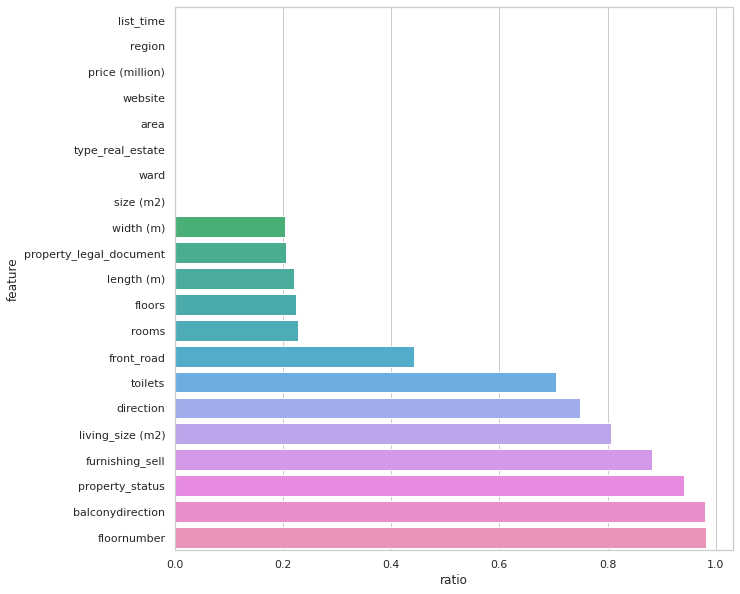

In [16]:
p = DPP.DataPreProcessor(BDS_df)
missing_df = p.cal_ratio_missing_data(BDS_df.columns)
print(missing_df)
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid", color_codes=False)
sns.barplot(y='feature', x='ratio', data=missing_df, orient='h')
plt.show()


In [17]:
BDS_df1 = BDS_df.copy()


### price


In [18]:
BDS_df1['price (million)'].describe()


count    2.208630e+05
mean     7.903109e+06
std      3.707341e+09
min      3.700000e-01
25%      2.750000e+03
50%      5.300000e+03
75%      1.100000e+04
max      1.742304e+12
Name: price (million), dtype: float64

In [19]:
BDS_df1[BDS_df1['price (million)'] == max(BDS_df1['price (million)'])]


,list_time,ward,area,region,property_status,direction,balconydirection,property_legal_document,size (m2),floornumber,furnishing_sell,rooms,toilets,floors,living_size (m2),width (m),length (m),price (million),type_real_estate,website,front_road
47178,01/11/2021,Phường 15,Quận Tân Bình,Tp Hồ Chí Minh,NaN,NaN,NaN,Đã có sổ,56.0,NaN,NaN,2,1,Nhiều hơn 10,56.0,4.0,14.0,1.742304e+12,Nhà ngõ,Chotot,NaN


In [20]:
price_mark = BDS_df1['price (million)'].quantile(0.99)
price_mark


160000.0

### _floor number_ (Cần thu thập thêm) => Loại


In [21]:
BDS_df1['floornumber'].unique()


array([ nan,  16.,   7.,   4.,  12.,   1.,  14.,  18.,  11.,  10.,   9.,
         3.,  29.,   2.,  15.,  22.,  21.,   8.,  19.,   6.,  20.,  35.,
        23.,  27.,  28.,   5.,  25.,  24.,  34.,  13.,  30.,  17.,  26.,
        40.,  37.,  36.,  32.,  33.,  38.,  47.,  39.,  31.,  41.,  45.,
       456.,  48., 320., 132.,  44.])

In [22]:
BDS_df1['floornumber'] = BDS_df1['floornumber'].apply(
    DPP.convertNum2Int, convert_dtype=False)


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='price (million)', ylabel='floornumber'>

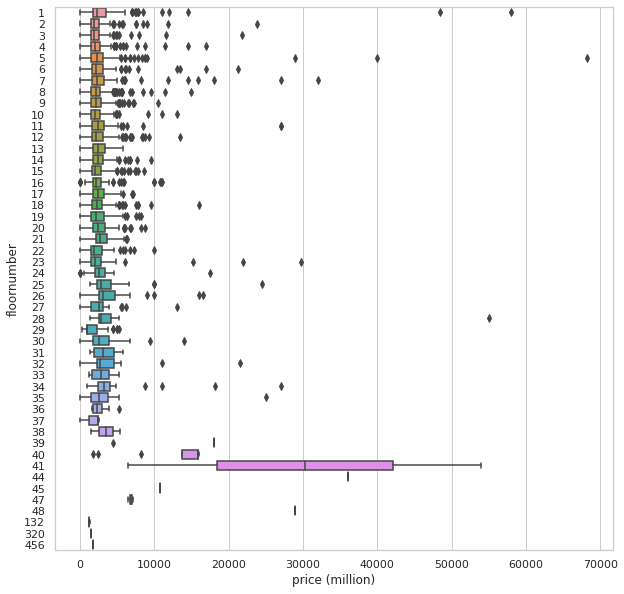

In [23]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=BDS_df1[BDS_df1['price (million)'] <= price_mark],
            y="floornumber", x='price (million)', orient='h')


In [24]:
BDS_df1[BDS_df1['floornumber'].isin([132, 320, 456])]


,list_time,ward,area,region,property_status,direction,balconydirection,property_legal_document,size (m2),floornumber,furnishing_sell,rooms,toilets,floors,living_size (m2),width (m),length (m),price (million),type_real_estate,website,front_road
28702,17/10/2021,Phường Trung Mỹ Tây,Quận 12,Tp Hồ Chí Minh,Đã bàn giao,NaN,NaN,Đã có sổ,85.0,456,NaN,2,2,Nhiều hơn 10,NaN,NaN,NaN,1750.0,Chung cư,Chotot,NaN
29655,11/10/2021,Phường An Lạc,Quận Bình Tân,Tp Hồ Chí Minh,Đã bàn giao,Tây,Đông,Đã có sổ,50.0,320,Nội thất đầy đủ,1,1,Nhiều hơn 10,NaN,NaN,NaN,1550.0,Chung cư,Chotot,NaN
30349,06/10/2021,Phường Thạnh Lộc,Quận 12,Tp Hồ Chí Minh,Đã bàn giao,NaN,NaN,Đang chờ sổ,46.0,132,Hoàn thiện cơ bản,2,1,Nhiều hơn 10,NaN,NaN,NaN,1300.0,Chung cư,Chotot,NaN
30662,03/10/2021,Phường Thạnh Lộc,Quận 12,Tp Hồ Chí Minh,Đã bàn giao,Đông,Nam,Đang chờ sổ,46.0,132,NaN,2,1,Nhiều hơn 10,NaN,NaN,NaN,1250.0,Chung cư,Chotot,NaN


In [25]:
# Loại bỏ giá trị tầng sô không tồn tại thực tế
BDS_df1 = BDS_df1[~BDS_df1['floornumber'].isin(
    [132, 320, 456])].reset_index(drop=True)


### _balcony direction_ (Loại)


In [26]:
BDS_df1['balconydirection'].unique()


array([nan, 'Nam', 'Đông Nam', 'Tây', 'Đông', 'Tây Nam', 'Tây Bắc', 'Bắc',
       'Đông Bắc'], dtype=object)

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='price (million)', ylabel='balconydirection'>

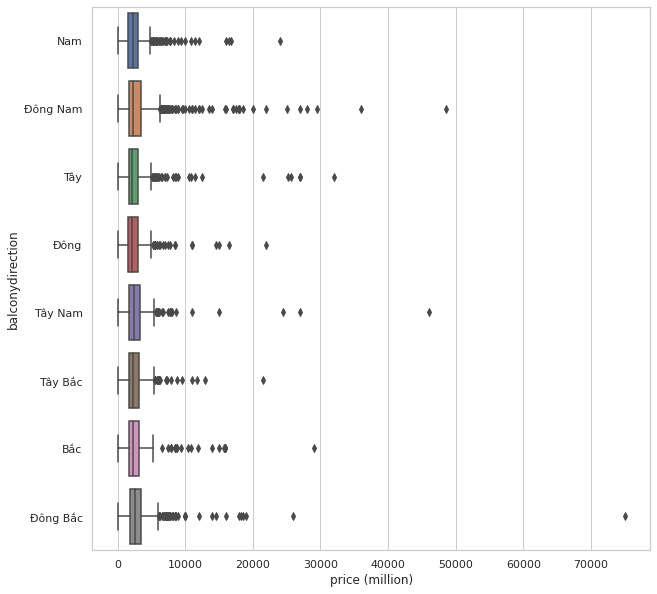

In [27]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=BDS_df1[BDS_df1['price (million)'] <= price_mark],
            y="balconydirection", x='price (million)', orient='h')


### _property status_ (Loại)


In [28]:
BDS_df1['property_status'].unique()


array(['Đã bàn giao', 'Chưa bàn giao', nan], dtype=object)

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='property_status', ylabel='price (million)'>

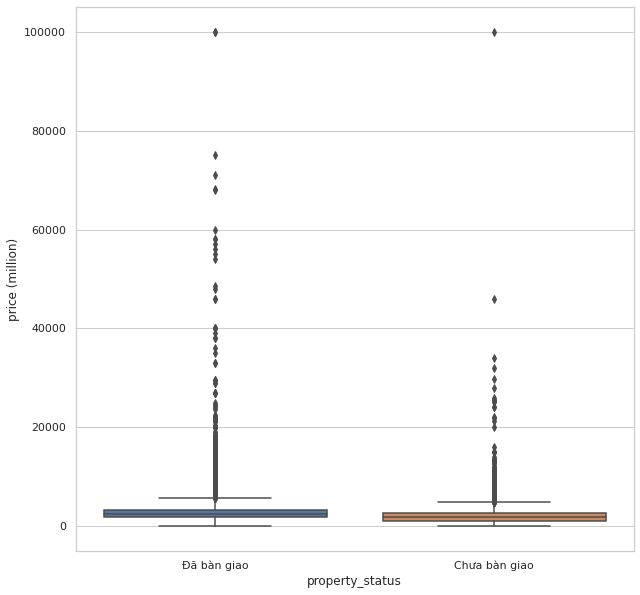

In [29]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=BDS_df1[BDS_df1['price (million)'] <=
            price_mark], x="property_status", y="price (million)")


### _furnishing_sell_ (Cần thu thập thêm) => Loại


In [30]:
BDS_df1["furnishing_sell"].unique()


array([nan, 'Nội thất đầy đủ', 'Hoàn thiện cơ bản', 'Bàn giao thô',
       'Nội thất cao cấp'], dtype=object)

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='furnishing_sell', ylabel='price (million)'>

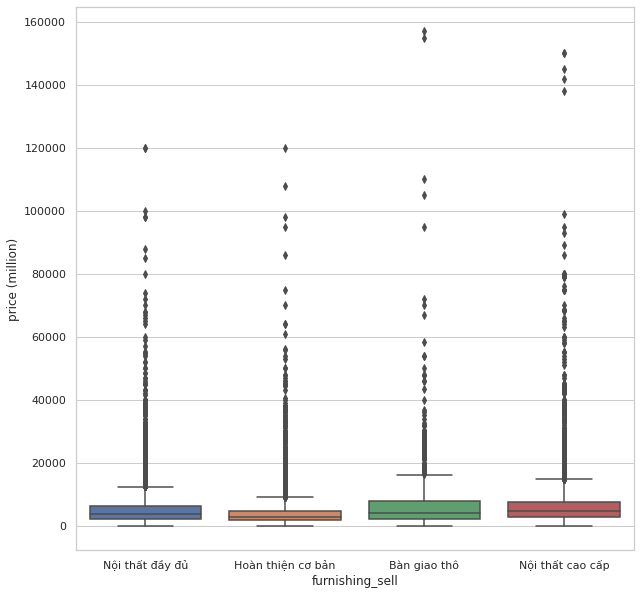

In [31]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=BDS_df1[BDS_df1['price (million)'] <=
            price_mark], x="furnishing_sell", y="price (million)")


### type real estate


In [32]:
BDS_df1['type_real_estate'].unique()


array(['Chung cư', 'Căn hộ dịch vụ', 'Duplex', 'Penthouse', 'Nhà mặt phố',
       'Nhà ngõ', 'Nhà phố liền kề', 'Nhà biệt thự', 'Đất thổ cư',
       'Đất nông nghiệp', 'Đất công nghiệp', 'Đất nền dự án', 'Tập thể',
       'Officetel', nan, 'Nhà mặt tiền', 'Nhà trong hẻm',
       'Đất thổ cư, đất ở', 'Căn hộ chung cư',
       'Đất nền, liền kề, đất dự án', 'Biệt thự, nhà liền kề',
       'Nhà hàng, khách sạn', 'Phòng trọ, nhà trọ', 'Kho, xưởng',
       'Đất nông, lâm nghiệp', 'Shop, kiot, quán', 'Mặt bằng',
       'Văn phòng', 'Trang trại', 'Các loại khác'], dtype=object)

In [33]:
real_estate = {"Căn hộ chung cư": "Chung cư",
               "Đất thổ cư, đất ở": "Đất thổ cư",
               "Nhà ngõ": 'Nhà trong hẻm',
               'Đất nền, liền kề, đất dự án': 'Đất nền dự án',
               'Đất nông nghiệp': 'Đất nông, lâm nghiệp',
               'Nhà mặt phố': 'Nhà mặt tiền',
               'Nhà phố liền kề': 'Biệt thự, nhà liền kề',
               'Nhà biệt thự': 'Biệt thự, nhà liền kề'
               }


<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='price (million)', ylabel='type_real_estate'>

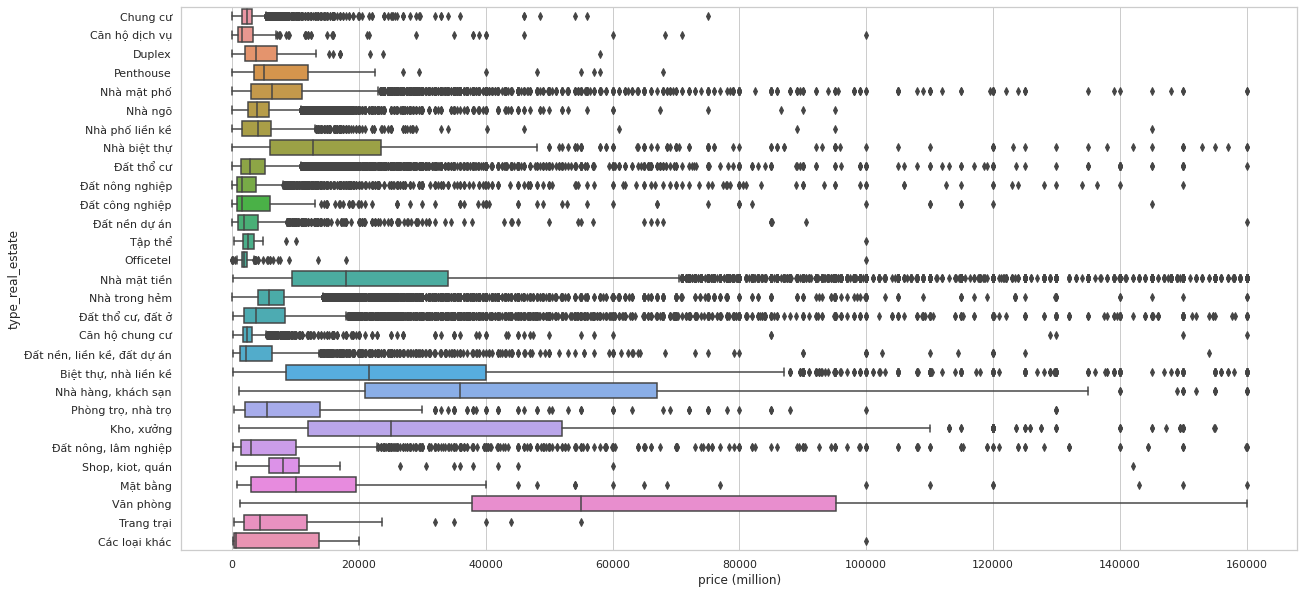

In [34]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=BDS_df1[BDS_df1['price (million)'] <= price_mark],
            x="price (million)", y="type_real_estate", orient='h')


In [35]:
BDS_df1["type_real_estate"].replace(real_estate, inplace=True)


### length, width, size


In [36]:
BDS_df1['length (m)'] = BDS_df1['length (m)'].apply(
    lambda x: np.nan if x == 0 else x)
BDS_df1['width (m)'] = BDS_df1['width (m)'].apply(
    lambda x: np.nan if x == 0 else x)


<AxesSubplot:xlabel='length (m)', ylabel='price (million)'>

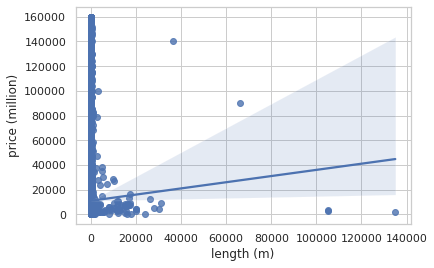

In [37]:
sns.regplot(data=BDS_df1[BDS_df1['price (million)'] <=
            price_mark], x="length (m)", y="price (million)")


In [38]:
BDS_df1['length (m)'].describe()


count    171648.000000
mean         29.927197
std         587.155782
min           0.580000
25%          12.000000
50%          17.000000
75%          22.000000
max      135000.000000
Name: length (m), dtype: float64

In [39]:
BDS_df1['length (m)'].quantile(0.99)


120.0

In [40]:
len(BDS_df1[BDS_df1['length (m)'] >= 120]), len(BDS_df1)


(1797, 220859)

In [41]:
BDS_df1[BDS_df1['length (m)'] >= 120].head()


,list_time,ward,area,region,property_status,direction,balconydirection,property_legal_document,size (m2),floornumber,furnishing_sell,rooms,toilets,floors,living_size (m2),width (m),length (m),price (million),type_real_estate,website,front_road
222,30/10/2021,Xã Long Hưng,Thành phố Biên Hòa,Đồng Nai,NaN,NaN,NaN,Giấy tờ khác,117.0,NaN,Bàn giao thô,4,4,Nhiều hơn 10,265.0,6.0,195.0,7000.0,Nhà mặt tiền,Chotot,NaN
369,05/11/2021,Phường Tân Phong,Thành phố Biên Hòa,Đồng Nai,NaN,Tây Bắc,NaN,Đã có sổ,170.0,NaN,NaN,4,3,Nhiều hơn 10,140.0,115.0,145.0,5700.0,Nhà trong hẻm,Chotot,NaN
560,03/11/2021,Xã Phú An,Huyện Tân Phú,Đồng Nai,NaN,Nam,NaN,Đã có sổ,80000.0,NaN,NaN,6,3,Nhiều hơn 10,80000.0,150.0,1000.0,25.0,"Biệt thự, nhà liền kề",Chotot,NaN
984,30/10/2021,Xã Bình Minh,Huyện Trảng Bom,Đồng Nai,NaN,Tây Nam,NaN,NaN,80.0,NaN,NaN,2,NaN,Nhiều hơn 10,80.0,366.0,239.0,950.0,Nhà trong hẻm,Chotot,NaN
1034,30/10/2021,Xã Long Hưng,Thành phố Biên Hòa,Đồng Nai,NaN,NaN,NaN,Giấy tờ khác,117.0,NaN,Bàn giao thô,4,4,Nhiều hơn 10,265.0,6.0,195.0,7000.0,Nhà mặt tiền,Chotot,NaN


<AxesSubplot:xlabel='width (m)', ylabel='price (million)'>

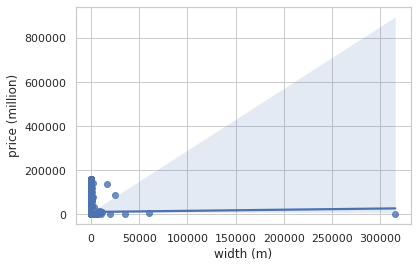

In [42]:
sns.regplot(data=BDS_df1[BDS_df1['price (million)'] <=
                         price_mark], x="width (m)", y="price (million)")


In [43]:
BDS_df1['width (m)'].describe()


count    175612.000000
mean         13.688224
std         782.852191
min           0.130000
25%           4.000000
50%           5.000000
75%           6.500000
max      315375.000000
Name: width (m), dtype: float64

In [44]:
BDS_df1[BDS_df1['width (m)'] == 315375]


,list_time,ward,area,region,property_status,direction,balconydirection,property_legal_document,size (m2),floornumber,furnishing_sell,rooms,toilets,floors,living_size (m2),width (m),length (m),price (million),type_real_estate,website,front_road
65594,18/10/2021,Phường An Lạc A,Quận Bình Tân,Tp Hồ Chí Minh,NaN,Tây,NaN,Đã có sổ,83.0,NaN,Hoàn thiện cơ bản,Nhiều hơn 10,Nhiều hơn 6,4,229.0,315375.0,26.0,160.0,Nhà mặt tiền,Chotot,NaN


In [45]:
BDS_df1['width (m)'].quantile(0.99)


72.0

In [46]:
len(BDS_df1[BDS_df1['width (m)'] >= 72]), len(BDS_df1)


(1762, 220859)

In [47]:
# Xử lý các giá trị NaN tại size và living size
for i in range(len(BDS_df1)):
    # Nếu size = NaN và living_size != NaN thì gán size = living_size
    if (np.isnan(BDS_df1.loc[i, "size (m2)"])) & (not np.isnan(BDS_df1.loc[i, "living_size (m2)"])):
        BDS_df1.at[i, "size (m2)"] = BDS_df1.loc[i,
                                                 "living_size (m2)"]
    # Nếu size = NaN và living_size = NaN thì gán size = length*width
    elif np.isnan(BDS_df1.loc[i, "size (m2)"]) & (np.isnan(BDS_df1.loc[i, "living_size (m2)"])):
        BDS_df1.at[i, "size (m2)"] = BDS_df1.loc[i,
                                                 "length (m)"]*BDS_df1.loc[i, "width (m)"]

    if np.isnan(BDS_df1.loc[i, "living_size (m2)"]):
        if not np.isnan(BDS_df1.loc[i, "size (m2)"]):
            if str(BDS_df1.loc[i, "floors"]) != 'nan':
                # Nếu floors != NaN thì living_size = size*floors
                # Nếu floors == Nhiều hơn 10 thì living_size = size*10
                try:
                    BDS_df1.at[i, "living_size (m2)"] = BDS_df1.loc[i,
                                                                    "size (m2)"]*BDS_df1.loc[i, "floors"]
                except:
                    BDS_df1.at[i,
                               "living_size (m2)"] = BDS_df1.loc[i, "size (m2)"]*10
            else:
                # Nếu floors == NaN thì living_size = size
                BDS_df1.at[i, "living_size (m2)"] = BDS_df1.loc[i,
                                                                "size (m2)"]


In [48]:
# Xử lý NaN length và width
for i in range(len(BDS_df1)):
    if not np.isnan(BDS_df1.loc[i, "size (m2)"]):

        if np.isnan(BDS_df1.loc[i, "length (m)"]) & np.isnan(BDS_df1.loc[i, "width (m)"]):
            continue

        elif np.isnan(BDS_df1.loc[i, "length (m)"]):
            BDS_df1.loc[i, "length (m)"] = round(
                BDS_df1.loc[i, "size (m2)"]/BDS_df1.loc[i, "width (m)"], 5)

        elif np.isnan(BDS_df1.loc[i, "width (m)"]):
            BDS_df1.loc[i, "width (m)"] = round(
                BDS_df1.loc[i, "size (m2)"]/BDS_df1.loc[i, "length (m)"], 5)


In [49]:
len(BDS_df1[["length (m)", "width (m)", "floors", "size (m2)", "living_size (m2)"]
            ][(BDS_df1["living_size (m2)"].isna()) | (BDS_df1["living_size (m2)"].isna())]), len(BDS_df1)


(109, 220859)

In [50]:
len(BDS_df1[(BDS_df1["length (m)"].isna()) | (BDS_df1["width (m)"].isna())])


44717

In [51]:
BDS_df1[(BDS_df1["length (m)"].isna()) | (
    BDS_df1["length (m)"].isna())].sample(5)


,list_time,ward,area,region,property_status,direction,balconydirection,property_legal_document,size (m2),floornumber,furnishing_sell,rooms,toilets,floors,living_size (m2),width (m),length (m),price (million),type_real_estate,website,front_road
6642,21/10/2021,Xã Phú Hữu,Huyện Nhơn Trạch,Đồng Nai,NaN,NaN,NaN,Đã có sổ,1000.0,NaN,NaN,NaN,NaN,Nhiều hơn 10,10000.0,NaN,NaN,1350.0,"Đất nông, lâm nghiệp",Chotot,NaN
26375,27/10/2021,Phường 1,Quận 5,Tp Hồ Chí Minh,Đã bàn giao,NaN,NaN,Đã có sổ,71.0,16,NaN,2,2,Nhiều hơn 10,710.0,NaN,NaN,2650.0,Chung cư,Chotot,NaN
203947,07/11/2021,Phường Tân Tạo,Quận Bình Tân,Hồ Chí Minh,NaN,NaN,NaN,NaN,64.0,NaN,NaN,5.0,NaN,3.0,192.0,NaN,NaN,5800.0,Nhà trong hẻm,alonhadat,8.0
22094,05/11/2021,Phường Bình Trị Đông B,Quận Bình Tân,Tp Hồ Chí Minh,Đã bàn giao,NaN,NaN,Đã có sổ,51.1,NaN,Nội thất đầy đủ,2,1,Nhiều hơn 10,511.0,NaN,NaN,1850.0,Chung cư,Chotot,NaN
186260,07/11/2021,Phường Tân Quý,Quận Tân Phú,Hồ Chí Minh,NaN,NaN,NaN,NaN,55.0,NaN,NaN,2.0,NaN,2.0,110.0,NaN,NaN,5700.0,Nhà trong hẻm,alonhadat,6.0


### living size vs size


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='price (million)', ylabel='size (m2)'>

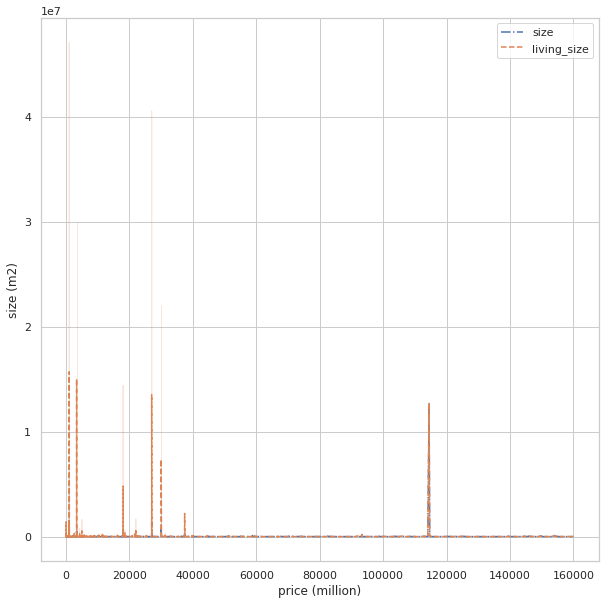

In [52]:
plt.figure(figsize=(10, 10))
ax = sns.lineplot(data=BDS_df1[BDS_df1['price (million)'] <=
                               price_mark], y='size (m2)', x="price (million)", linestyle='-.', label="size")
sns.lineplot(data=BDS_df1[BDS_df1['price (million)'] <=
                          price_mark], y='living_size (m2)', x="price (million)", linestyle='--', label="living_size", ax=ax)


In [53]:
BDS_df1['living_size (m2)'].describe()


count    2.207500e+05
mean     1.348093e+05
std      2.897950e+07
min      1.000000e+00
25%      1.000000e+02
50%      2.040000e+02
75%      5.520000e+02
max      9.000000e+09
Name: living_size (m2), dtype: float64

### direction


In [54]:
BDS_df2 = BDS_df1.copy()


In [55]:
BDS_df2["direction"].unique()


array([nan, 'Bắc', 'Đông Bắc', 'Đông Nam', 'Đông', 'Tây Bắc', 'Tây',
       'Nam', 'Tây Nam'], dtype=object)

In [56]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
direction = imp.fit_transform(BDS_df2['direction'].values.reshape(-1, 1))


In [57]:
BDS_df2['direction'] = direction.flatten()


<AxesSubplot:xlabel='direction', ylabel='price (million)'>

Text(0.5, 1.0, 'Chưa điền giá trị')

<AxesSubplot:xlabel='direction', ylabel='price (million)'>

Text(0.5, 1.0, 'Đã điền giá trị')

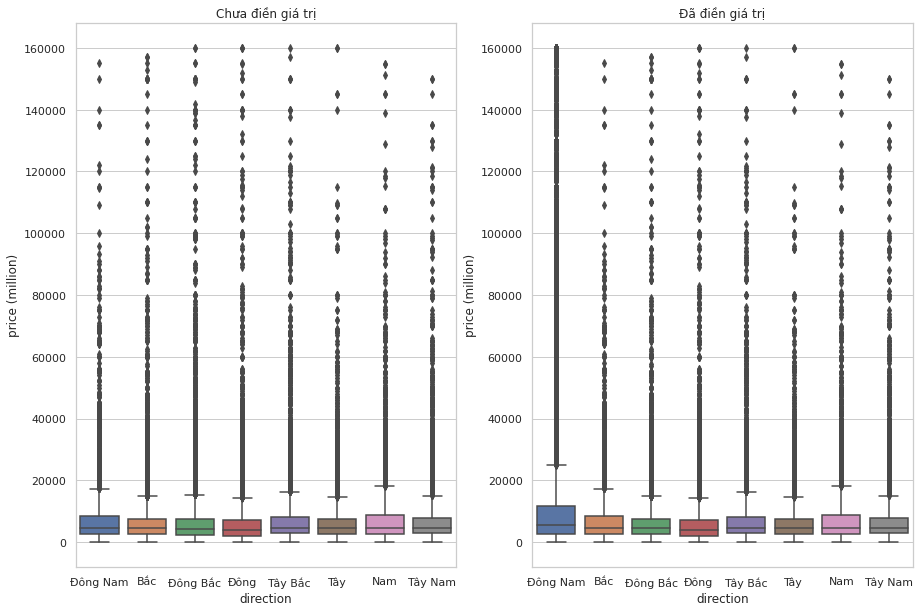

In [58]:
# plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex=True)

sns.boxplot(data=BDS_df1[BDS_df1['price (million)'] <= price_mark],
            x="direction", y="price (million)", ax=axes[0])
axes[0].set_title("Chưa điền giá trị")
sns.boxplot(data=BDS_df2[BDS_df2['price (million)'] <= price_mark],
            x="direction", y="price (million)", ax=axes[1])
axes[1].set_title("Đã điền giá trị")


In [198]:
BDS_df2.to_csv('data version/BDS_df2.csv', index=False)

### DF2

In [199]:
BDS_df2 = pd.read_csv('data version/BDS_df2.csv')

### toilets


In [59]:
BDS_df3 = BDS_df2.copy()


In [60]:
BDS_df3['toilets'].unique()


array(['2', '1', nan, '5', '3', 'Nhiều hơn 6', '4', '6'], dtype=object)

In [61]:
BDS_df3['toilets'] = BDS_df3['toilets'].apply(
    DPP.convertNum2Int, convert_dtype=False)
BDS_df3['toilets'] = BDS_df3['toilets'].astype('category')


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='toilets', ylabel='price (million)'>

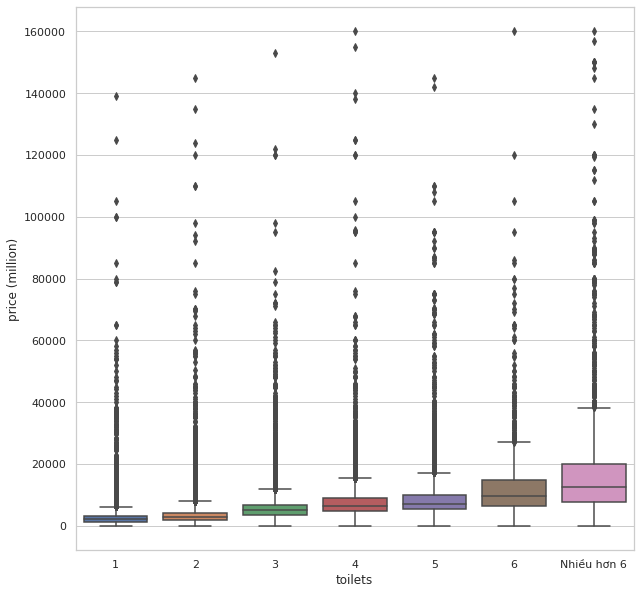

In [62]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=BDS_df3[BDS_df3['price (million)'] <=
            price_mark], x="toilets", y="price (million)")


In [63]:
BDS_df3['toilets'].replace({'Nhiều hơn 6': 7}, inplace=True)


In [64]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7)


In [65]:
toilets = imputer.fit_transform(BDS_df3[['toilets', 'price (million)']])


In [66]:
toilets = [int(x[0]) if x[0] <= 6 else 'Nhiều hơn 6' for x in toilets]


In [67]:
BDS_df3['toilets'] = toilets
BDS_df3['toilets'] = BDS_df3['toilets'].astype('category')


<AxesSubplot:xlabel='toilets', ylabel='price (million)'>

Text(0.5, 1.0, 'Chưa điền giá trị')

<AxesSubplot:xlabel='toilets', ylabel='price (million)'>

Text(0.5, 1.0, 'Đã điền giá trị')

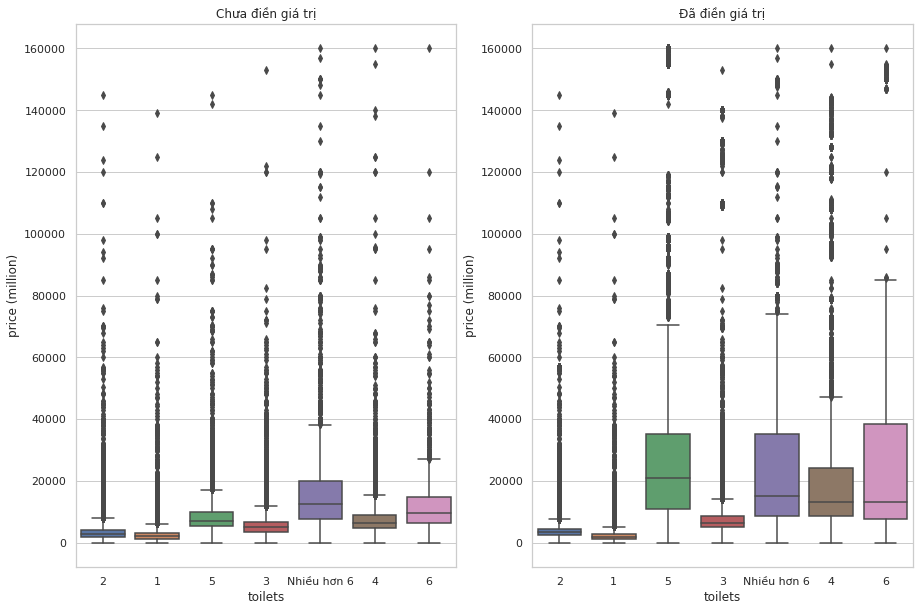

In [113]:
# plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex=True)

sns.boxplot(data=BDS_df1[BDS_df1['price (million)'] <= price_mark],
            x="toilets", y="price (million)", ax=axes[0])
axes[0].set_title("Chưa điền giá trị")
sns.boxplot(data=BDS_df3[BDS_df3['price (million)'] <= price_mark],
            x="toilets", y="price (million)", ax=axes[1])
axes[1].set_title("Đã điền giá trị")


In [201]:
BDS_df3.to_csv('data version/BDS_df3.csv', index=False)

### DF3

In [202]:
BDS_df3 = pd.read_csv('data version/BDS_df3.csv')

### front road


In [68]:
BDS_df4 = BDS_df3.copy()


In [69]:
BDS_df4['front_road'].describe()


count    123125.000000
mean         10.997237
std          17.639068
min           0.000000
25%           5.000000
50%           8.000000
75%          13.000000
max         825.000000
Name: front_road, dtype: float64

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='front_road', ylabel='price (million)'>

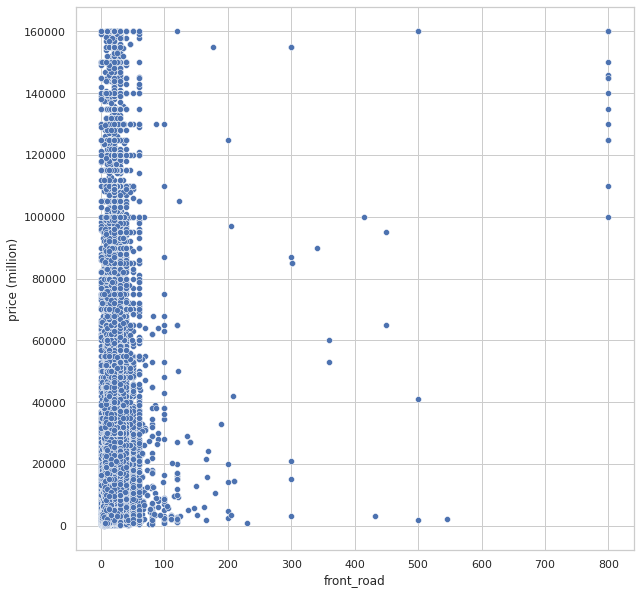

In [70]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=BDS_df4[BDS_df4['price (million)']
                <= price_mark], x="front_road", y="price (million)")


In [71]:
BDS_df4['front_road'].quantile(0.99)


40.0

In [72]:
BDS_df4 = BDS_df4[~(BDS_df4['front_road'] > 26)].reset_index(drop=True)


In [73]:
BDS_df4['front_road'].isna().sum()


97734

In [74]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()


In [75]:
front_road = imputer.fit_transform(BDS_df4[['front_road', 'price (million)']])


In [76]:
BDS_df4['front_road'] = [x[0] for x in front_road]


<AxesSubplot:xlabel='front_road', ylabel='price (million)'>

Text(0.5, 1.0, 'Chưa điền giá trị')

<AxesSubplot:xlabel='front_road', ylabel='price (million)'>

Text(0.5, 1.0, 'Đã điền giá trị')

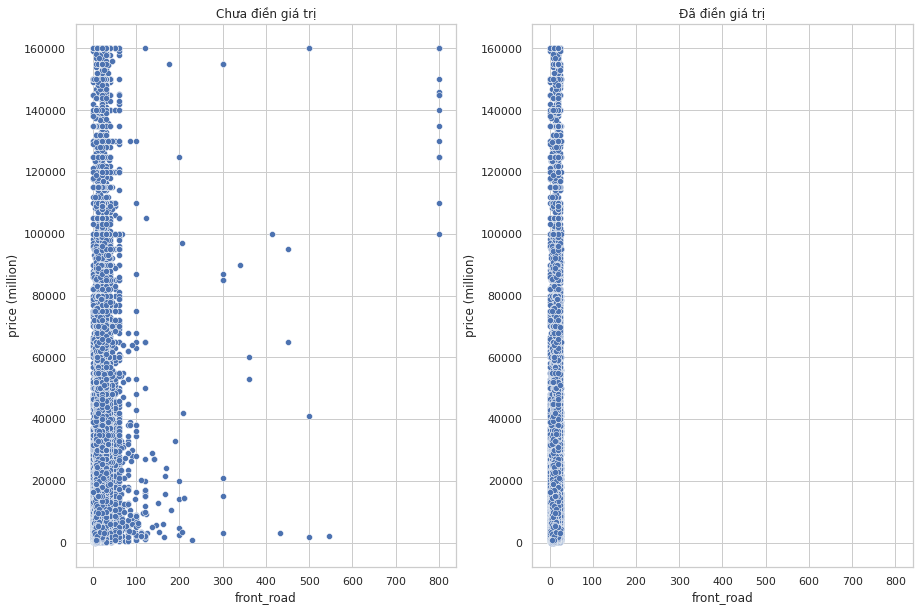

In [116]:
# plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex=True)

sns.scatterplot(data=BDS_df1[BDS_df1['price (million)'] <= price_mark],
                x="front_road", y="price (million)", ax=axes[0])
axes[0].set_title("Chưa điền giá trị")
sns.scatterplot(data=BDS_df4[BDS_df4['price (million)'] <= price_mark],
                x="front_road", y="price (million)", ax=axes[1])
axes[1].set_title("Đã điền giá trị")


### region


In [77]:
BDS_df4['region'].unique()


array(['Đồng Nai', 'Bình Dương', 'Tp Hồ Chí Minh', 'Hồ Chí Minh'],
      dtype=object)

In [78]:
BDS_df4['region'].replace({'Tp Hồ Chí Minh': 'Hồ Chí Minh'}, inplace=True)


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='region', ylabel='price (million)'>

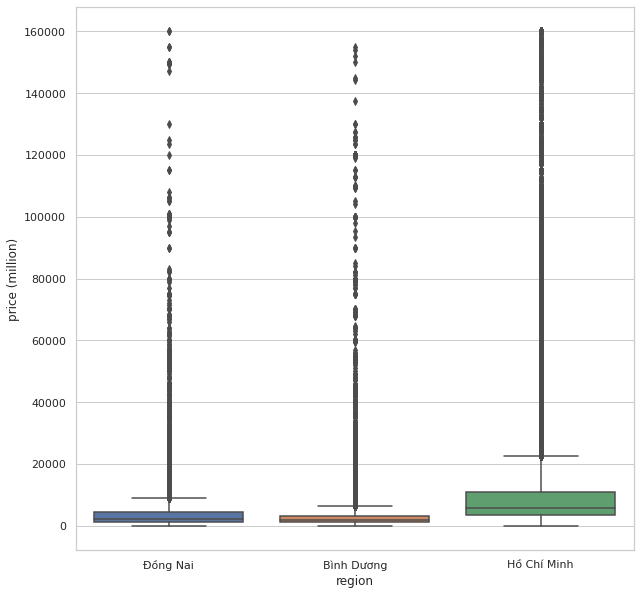

In [79]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=BDS_df4[BDS_df4['price (million)'] <=
            price_mark], x="region", y="price (million)")


### area


In [80]:
region_cols = ['ward', 'area', 'region']
BDS_df4[region_cols].groupby(
    region_cols[1:]).count().sort_values(axis=0, by=['region'])


,,ward
area,region,
Huyện Bàu Bàng,Bình Dương,1087
Thị xã Bến Cát,Bình Dương,2233
Thành phố Thủ Dầu Một,Bình Dương,2853
Thành phố Thuận An,Bình Dương,3508
Thành phố Dĩ An,Bình Dương,963
Thị xã Dĩ An,Bình Dương,2832
Huyện Phú Giáo,Bình Dương,219
Thị xã Tân Uyên,Bình Dương,1830
Huyện Dầu Tiếng,Bình Dương,430


In [81]:
BDS_df4.replace({'Thị xã Dĩ An': 'Thành phố Dĩ An',
                'Thành phố Biên Hoà': 'Thành phố Biên Hòa',
                 'Quận Thủ Đức': 'Thành phố Thủ Đức'}, inplace=True)


In [82]:
BDS_df4 = BDS_df4[BDS_df4['area'] != "Quận Bắc Từ Liêm"].reset_index(drop=True)


<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Giá bất động sản ở Tp Hồ Chí Minh')

<AxesSubplot:title={'center':'Giá bất động sản ở Tp Hồ Chí Minh'}, xlabel='price (million)', ylabel='area'>

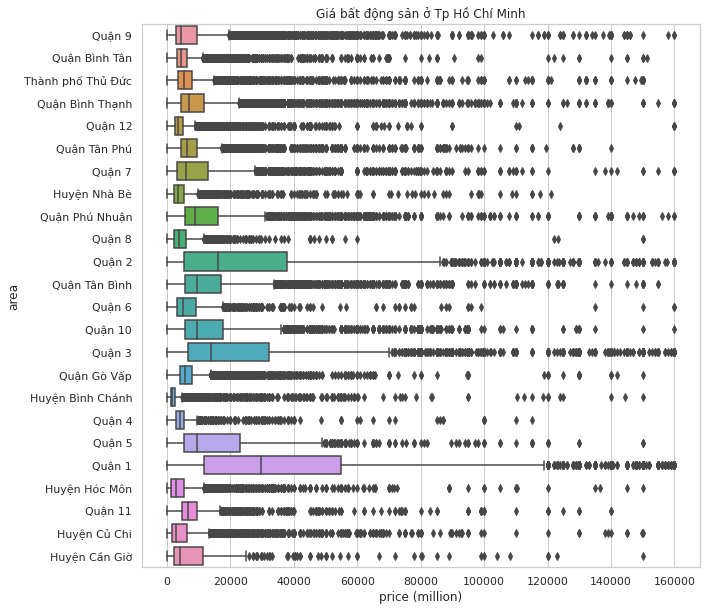

In [83]:
plt.figure(figsize=(10, 10))
# sns.countplot(x='region',data=BDS_df4)
BDS_HCM = BDS_df4[(BDS_df4['price (million)'] <= price_mark)
                  & (BDS_df4['region'] == "Hồ Chí Minh")]
plt.title("Giá bất động sản ở Tp Hồ Chí Minh")
sns.boxplot(y='area', x='price (million)', orient='h', data=BDS_HCM)


<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Giá bất động sản ở Bình Dương')

<AxesSubplot:title={'center':'Giá bất động sản ở Bình Dương'}, xlabel='price (million)', ylabel='area'>

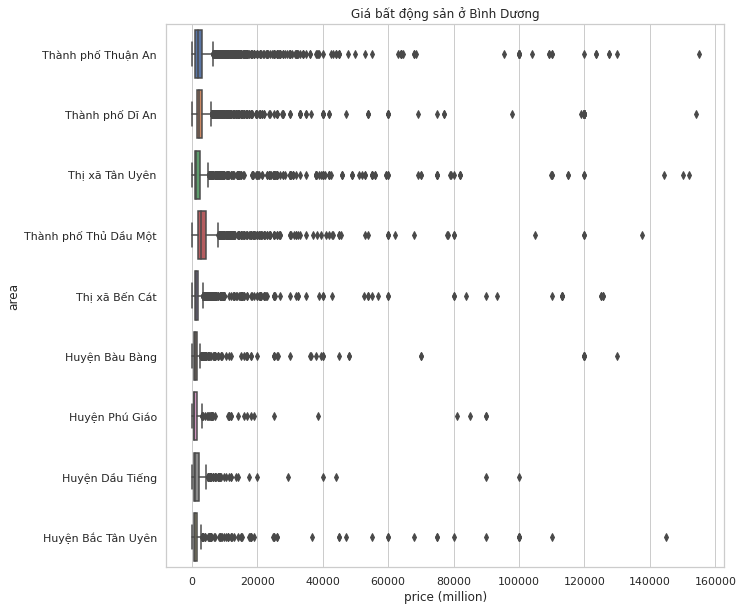

In [84]:
plt.figure(figsize=(10, 10))
# sns.countplot(x='region',data=BDS_df4)
BDS_BD = BDS_df4[(BDS_df4['price (million)'] <= price_mark)
                 & (BDS_df4['region'] == "Bình Dương")]
plt.title("Giá bất động sản ở Bình Dương")
sns.boxplot(y='area', x='price (million)', orient='h', data=BDS_BD)


<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Giá bất động sản ở Đồng Nai')

<AxesSubplot:title={'center':'Giá bất động sản ở Đồng Nai'}, xlabel='price (million)', ylabel='area'>

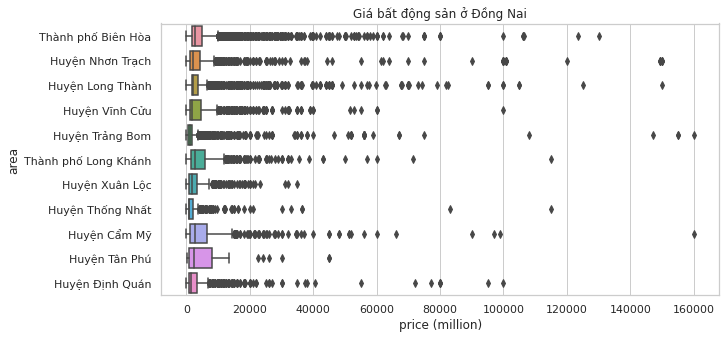

In [85]:
plt.figure(figsize=(10, 5))
# sns.countplot(x='region',data=BDS_df4)
BDS_DN = BDS_df4[(BDS_df4['price (million)'] <= price_mark)
                 & (BDS_df4['region'] == "Đồng Nai")]
plt.title("Giá bất động sản ở Đồng Nai")
sns.boxplot(y='area', x='price (million)', orient='h', data=BDS_DN)


In [203]:
BDS_df4.to_csv('data version/BDS_df4.csv', index=False)

### DF4

In [204]:
BDS_df4 = pd.read_csv('data version/BDS_df4.csv')

### ward


In [86]:
BDS_df5 = BDS_df4.copy()


In [87]:
BDS_df5['ward'].unique()


array(['Phường Tam Hòa', 'Phường Thống Nhất', 'Phường Hố Nai',
       'Phường Hoá An', 'Phường Bửu Long', 'Xã Đại Phước', 'Xã Phước An',
       'Phường An Bình', 'Phường Phước Tân', 'Phường Hòa Bình',
       'Phường Thanh Bình', 'Phường Quyết Thắng', 'Phường Tam Hiệp',
       'Phường Tân Hiệp', 'Phường Tân Biên', 'Phường Quang Vinh',
       'Phường Trảng Dài', 'Xã Long Đức', 'Thị trấn Long Thành',
       'Xã Long Hưng', 'Phường Long Bình Tân', 'Phường Tân Vạn',
       'Xã Cẩm Đường', 'Phường Tam Phước', 'Phường Tân Phong',
       'Xã Thạnh Phú', 'Xã Hố Nai 3', 'Phường Bửu Hòa', 'Xã Tây Hoà',
       'Phường Tân Mai', 'Phường Bình Đa', 'Phường Long Bình',
       'Xã Bình Hòa', 'Phường Tân Tiến', 'Phường Tân Hạnh', 'Xã Bắc Sơn',
       'Thị trấn Trảng Bom', 'Phường Bảo Vinh', 'Xã Trung Hoà',
       'Phường An Hoà', 'Thị trấn Hiệp Phước', 'Xã An Phước',
       'Phường Trung Dũng', 'Xã Quảng Tiến', 'Xã Xuân Bắc',
       'Xã Thiện Tân', 'Xã Bình Lợi', 'Xã Hưng Thịnh', 'Xã An Viễn',
       'X

In [88]:
BDS_df5['ward'].replace(
    {"xã Tân An Hội Xã Tân An Hội": "Xã Tân An Hội"}, inplace=True)


In [89]:
def replace_error_value(x):
    '''
        Kiểm tra và thay thế các giá trị không đúng định dạng trong thuộc tính ward
        Giá trị bắt đầu là "Xã", "Phường", "Thị trấn" là hợp lệ

        Parameters
        ----------
            - x (string): chuỗi giá trị cần kiểm tra

        Returns
        ----------
            - Kết quả sau khi kiểm tra
    '''
    if isinstance(x, (int, float)) or x == np.nan:
        return np.nan

    temp = x.lower()
    if temp.startswith(('xã', 'phường', 'thị trấn')):
        return x

    return np.nan


BDS_df5['ward'] = BDS_df5['ward'].apply(replace_error_value)


In [90]:
region_cols = ['ward', 'area', 'region']
BDS_df5[region_cols].groupby(
    region_cols).all().sort_values(axis=0, by=['region', 'area'])


,,
ward,area,region
Thị Trấn Bàu Bàng,Huyện Bàu Bàng,Bình Dương
Thị trấn Lai Uyên,Huyện Bàu Bàng,Bình Dương
Xã Cây Trường II,Huyện Bàu Bàng,Bình Dương
Xã Hưng Hòa,Huyện Bàu Bàng,Bình Dương
Xã Lai Hưng,Huyện Bàu Bàng,Bình Dương
Xã Long Nguyên,Huyện Bàu Bàng,Bình Dương
Xã Trừ Văn Thố,Huyện Bàu Bàng,Bình Dương
Xã Tân Hưng,Huyện Bàu Bàng,Bình Dương
Thị trấn Tân Thành,Huyện Bắc Tân Uyên,Bình Dương


In [205]:
BDS_df5.to_csv('data version/BDS_df5.csv', index=False)

### DF5

In [206]:
BDS_df5 = pd.read_csv('data version/BDS_df5.csv')

### Property legal document


In [91]:
BDS_df6 = BDS_df5.copy()


In [92]:
property_doc = ['property_legal_document', 'website']
BDS_df6[property_doc].groupby(
    property_doc[0]).count().sort_values(by=['website'])


,website
property_legal_document,
Giấy phép KD,17
Giấy phép XD,128
Giấy tờ hợp lệ,3727
Giấy tờ khác,4642
Đang chờ sổ,5941
Đã có sổ,71460
Sổ hồng/ Sổ đỏ,83012


<Figure size 1440x576 with 0 Axes>

<AxesSubplot:xlabel='property_legal_document', ylabel='price (million)'>

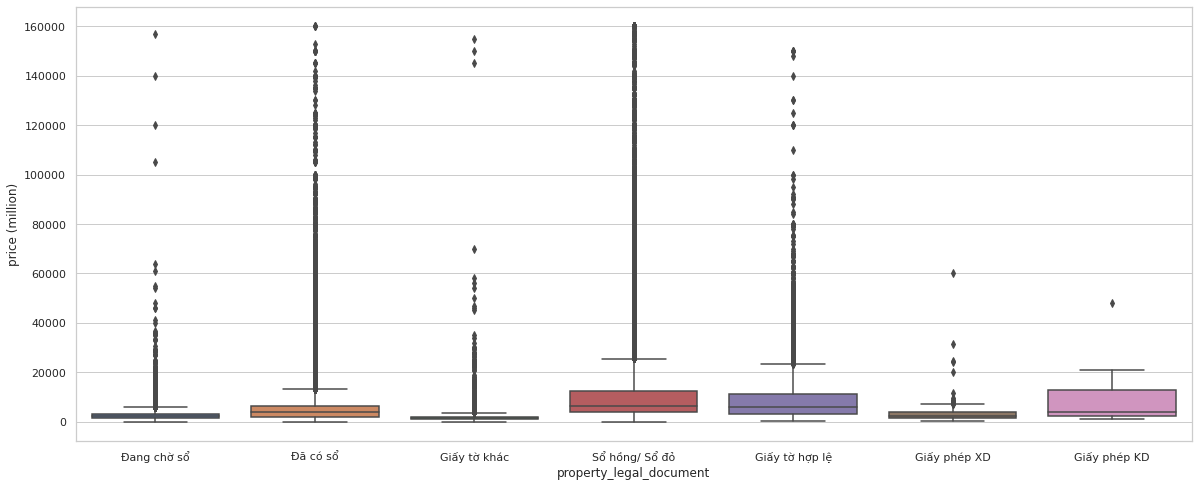

In [93]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='property_legal_document', y='price (million)',
            data=BDS_df6[BDS_df6['price (million)'] <= price_mark])


In [94]:
BDS_df6['property_legal_document'].replace({"Sổ hồng/ Sổ đỏ": 'Đã có sổ',
                                           "Giấy tờ hợp lệ": "Giấy tờ khác",
                                            "Giấy phép XD": "Giấy tờ khác",
                                            "Giấy phép KD": "Giấy tờ khác"}, inplace=True)


In [95]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
property_legal_document = imp.fit_transform(
    BDS_df6['property_legal_document'].values.reshape(-1, 1))


In [96]:
BDS_df6['property_legal_document'] = property_legal_document.flatten()


<AxesSubplot:xlabel='property_legal_document', ylabel='price (million)'>

Text(0.5, 1.0, 'Chưa điền giá trị')

<AxesSubplot:xlabel='property_legal_document', ylabel='price (million)'>

Text(0.5, 1.0, 'Đã điền giá trị')

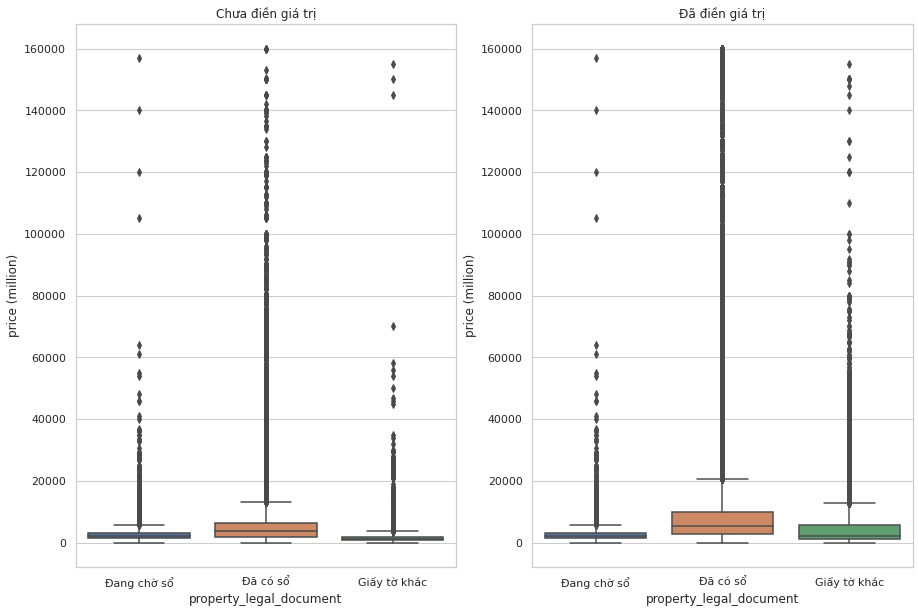

In [114]:
# plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex=True)

sns.boxplot(data=BDS_df1[BDS_df1['price (million)'] <= price_mark],
            x="property_legal_document", y="price (million)", ax=axes[0])
axes[0].set_title("Chưa điền giá trị")
sns.boxplot(data=BDS_df6[BDS_df6['price (million)'] <= price_mark],
            x="property_legal_document", y="price (million)", ax=axes[1])
axes[1].set_title("Đã điền giá trị")


In [207]:
BDS_df6.to_csv('data version/BDS_df6.csv', index=False)

### DF6

In [208]:
BDS_df6 = pd.read_csv('data version/BDS_df6.csv')

### floors


In [118]:
BDS_df7 = BDS_df6.copy()


In [119]:
BDS_df7['floors'].unique()


array(['Nhiều hơn 10', '1', '3', '2', '4', '5', '6', '7', '10', '9', '8',
       nan, 2.0, 1.0, 18.0, 23.0, 4.0, 6.0, 3.0, 26.0, 35.0, 10.0, 30.0,
       15.0, 12.0, 8.0, 40.0, 38.0, 5.0, 29.0, 19.0, 31.0, 9.0, 33.0,
       17.0, 20.0, 13.0, 22.0, 24.0, 11.0, 14.0, 27.0, 16.0, 25.0, 36.0,
       7.0, 28.0, 32.0, 34.0, 21.0, 151.0, 50.0, 61.0, 39.0, 48.0, 42.0,
       44.0, 37.0, 75.0, 2000.0, 988.0, 333.0, 163.0, 45.0, 144.0, 43.0,
       91.0, 46.0, 55.0, 52.0], dtype=object)

In [120]:
BDS_df7['floors'] = BDS_df7['floors'].apply(
    DPP.convertNum2Int, convert_dtype=False)


In [121]:
floors = BDS_df7['floors'].unique()[1:]
floors[floors > 81]


array([151, 2000, 988, 333, 163, 144, 91], dtype=object)

In [122]:
# Loại các tin đăng có số lầu lớn hơn 81 vì nó không tồn tại ở Viêt Nam hiện tại
BDS_df7 = BDS_df7[~BDS_df1['floors'].isin(
    floors[floors > 81])].reset_index(drop=True)


In [123]:
# Gom nhóm các giá trị có số lầu nhiều hơn 10
BDS_df7['floors'].replace(floors[floors > 10], 'Nhiều hơn 10', inplace=True)


In [124]:
# Chuyển floors về dạng category
BDS_df7['floors'] = BDS_df7['floors'].astype('category')


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='price (million)', ylabel='floors'>

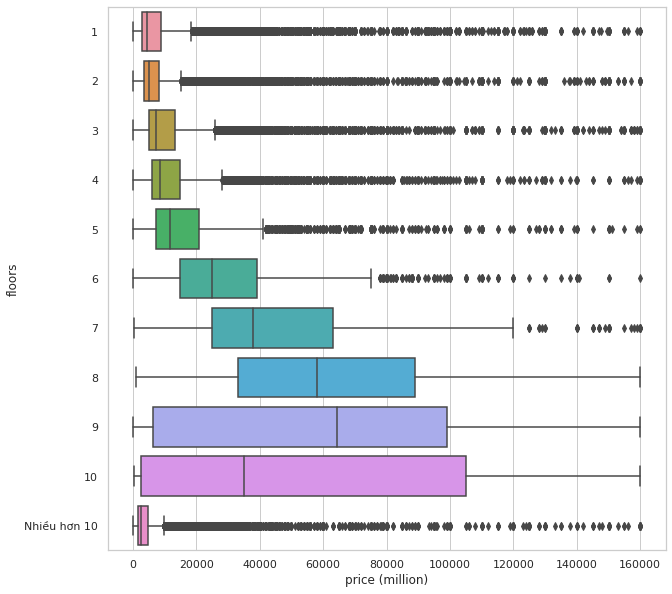

In [125]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=BDS_df7[BDS_df7['price (million)'] <=
            price_mark], y="floors", x="price (million)", orient='h')


In [126]:
BDS_df7['floors'].replace({'Nhiều hơn 10': 11}, inplace=True)


In [127]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=11)


In [128]:
floors = imputer.fit_transform(BDS_df7[['floors', 'price (million)']])


In [129]:
floors = [int(x[0]) if x[0] <= 10 else 'Nhiều hơn 10' for x in floors]


In [130]:
BDS_df7['floors'] = floors
# Chuyển floors về dạng category
BDS_df7['floors'] = BDS_df7['floors'].astype('category')


<AxesSubplot:xlabel='floors', ylabel='price (million)'>

Text(0.5, 1.0, 'Chưa điền giá trị')

<AxesSubplot:xlabel='floors', ylabel='price (million)'>

Text(0.5, 1.0, 'Đã điền giá trị')

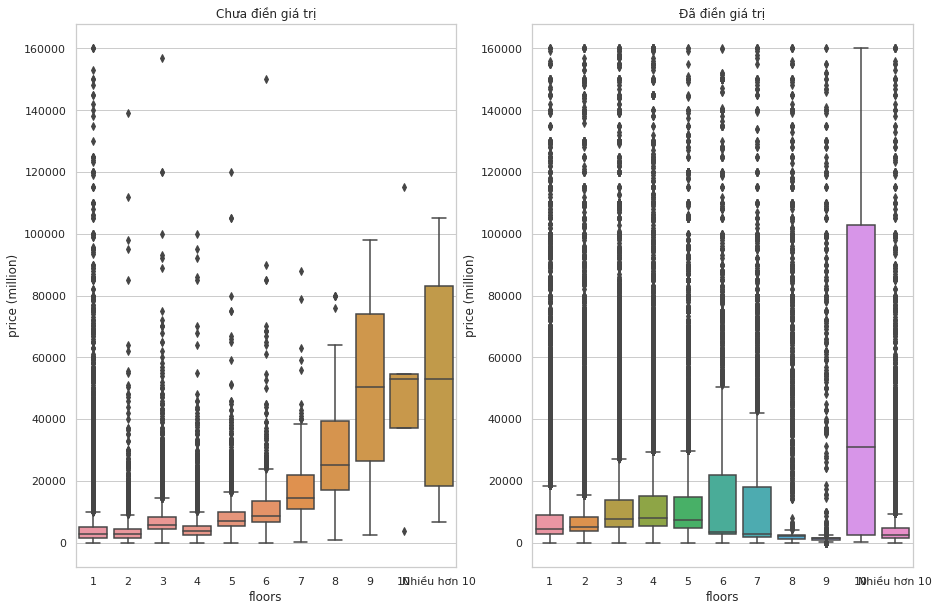

In [131]:
# plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex=True)

sns.boxplot(data=BDS_df1[BDS_df1['price (million)'] <= price_mark],
            x="floors", y="price (million)", ax=axes[0])
axes[0].set_title("Chưa điền giá trị")
sns.boxplot(data=BDS_df7[BDS_df7['price (million)'] <= price_mark],
            x="floors", y="price (million)", ax=axes[1])
axes[1].set_title("Đã điền giá trị")


In [209]:
BDS_df7.to_csv('data version/BDS_df7.csv', index=False)

### DF7

In [210]:
BDS_df7 = pd.read_csv('data version/BDS_df7.csv')

### rooms


In [172]:
BDS_df8 = BDS_df7.copy()


In [173]:
BDS_df8['rooms'].unique()


array(['2', '1', '3', '4', '10', '8', '6', '9', '5', '7', 'Nhiều hơn 10',
       nan, 3.0, 18.0, 24.0, 2.0, 4.0, 35.0, 1.0, 30.0, 5.0, 8.0, 6.0,
       22.0, 12.0, 54.0, 68.0, 36.0, 10.0, 7.0, 20.0, 55.0, 14.0, 16.0,
       15.0, 13.0, 9.0, 25.0, 17.0, 32.0, 28.0, 11.0, 21.0, 27.0, 95.0,
       19.0, 37.0, 60.0, 40.0, 62.0, 50.0, 120.0, 42.0, 100.0, 33.0, 23.0,
       29.0, 72.0, 45.0, 58.0, 31.0, 192.0, 26.0, 44.0, 160.0, 48.0, 65.0,
       74.0, 34.0, 41.0, 39.0, 80.0, 43.0, 104.0, 46.0, 51.0, 89.0, 84.0,
       63.0, 61.0, 56.0, 105.0, 71.0, 67.0, 70.0, 85.0, 88.0, 111.0,
       101.0, 150.0, 123.0, 90.0, 373.0, 145.0, 114.0, 57.0, 66.0, 75.0,
       115.0, 94.0, 49.0, 69.0, 162.0, 102.0, 52.0, 110.0, 195.0, 170.0,
       64.0, 76.0, 128.0, 86.0, 53.0, 81.0, 38.0, 140.0, 98.0, 200.0,
       424.0, 73.0, 307.0, 47.0, 92.0, 193.0, 300.0, 96.0, 79.0, 277.0,
       87.0, 333.0, 124.0, 138.0, 78.0], dtype=object)

In [174]:
BDS_df8['rooms'] = BDS_df8['rooms'].apply(
    DPP.convertNum2Int, convert_dtype=False)


In [175]:
# Chuyển rooms về dạng category
BDS_df8['rooms'] = BDS_df8['rooms'].astype('category')


In [176]:
rooms = list(BDS_df8['rooms'].unique())
rooms.remove('Nhiều hơn 10')


In [177]:
rooms = np.array(rooms)
# Gom nhóm các giá trị có số phòng nhiều hơn 10
BDS_df8['rooms'].replace(rooms[rooms > 10], 'Nhiều hơn 10', inplace=True)


In [180]:
BDS_df8['rooms'].replace({'Nhiều hơn 10': 11}, inplace=True)


In [181]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=11)


In [182]:
rooms = imputer.fit_transform(BDS_df8[['rooms', 'price (million)']])


In [183]:
rooms = [int(x[0]) if x[0] <= 10 else 'Nhiều hơn 10' for x in rooms]


In [184]:
BDS_df8['rooms'] = rooms
# Chuyển rooms về dạng category
BDS_df8['rooms'] = BDS_df8['rooms'].astype('category')


<AxesSubplot:xlabel='rooms', ylabel='price (million)'>

Text(0.5, 1.0, 'Chưa điền giá trị')

<AxesSubplot:xlabel='rooms', ylabel='price (million)'>

Text(0.5, 1.0, 'Đã điền giá trị')

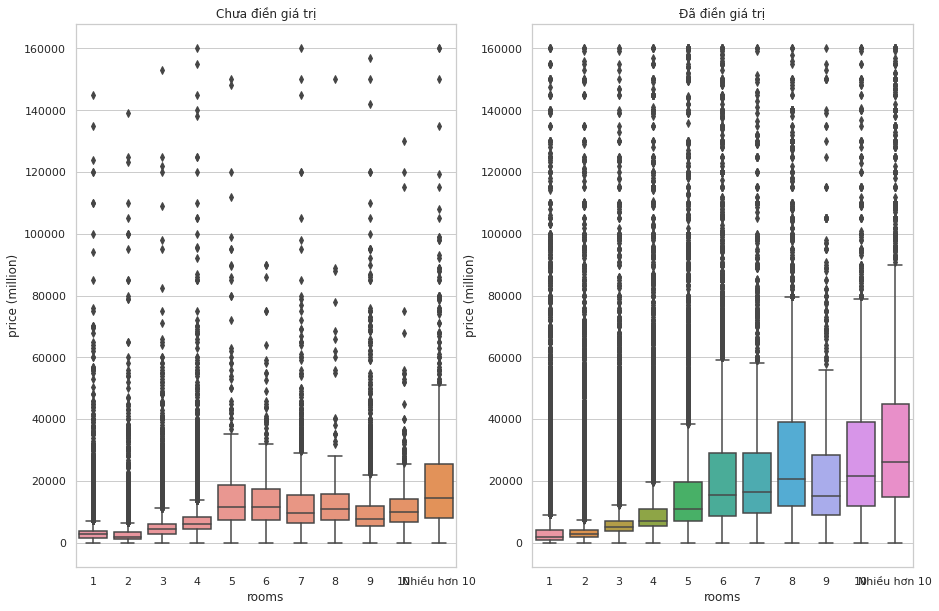

In [185]:
# plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex=True)

sns.boxplot(data=BDS_df1[BDS_df1['price (million)'] <= price_mark],
            x="rooms", y="price (million)", ax=axes[0])
axes[0].set_title("Chưa điền giá trị")
sns.boxplot(data=BDS_df8[BDS_df8['price (million)'] <= price_mark],
            x="rooms", y="price (million)", ax=axes[1])
axes[1].set_title("Đã điền giá trị")


### list time


In [186]:
BDS_df8['list_time'] = pd.to_datetime(BDS_df8['list_time'], format="%d/%m/%Y")


In [187]:
BDS_df8['list_time'].sample(5)


9278     2021-11-03
195473   2021-11-07
150697   2021-11-04
44447    2021-11-02
27458    2021-10-22
Name: list_time, dtype: datetime64[ns]

In [211]:
BDS_df8.to_csv('data version/BDS_df8.csv', index=False)

### DF8

In [212]:
BDS_df8 = pd.read_csv('data version/BDS_df8.csv')

## 3.1 Overview


In [188]:
BDS_df8.drop(["floornumber", "balconydirection", "property_status",
              "furnishing_sell"], axis=1, inplace=True)


In [235]:
BDS_df9 = BDS_df8.copy()
BDS_df9.dropna(inplace=True)

In [236]:
BDS_df9['toilets'] = BDS_df9['toilets'].astype('category')

In [237]:
BDS_df9.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 168677 entries, 218 to 211614
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   list_time                168677 non-null  object  
 1   ward                     168677 non-null  object  
 2   area                     168677 non-null  object  
 3   region                   168677 non-null  object  
 4   direction                168677 non-null  object  
 5   property_legal_document  168677 non-null  object  
 6   size (m2)                168677 non-null  float64 
 7   rooms                    168677 non-null  object  
 8   toilets                  168677 non-null  category
 9   floors                   168677 non-null  object  
 10  living_size (m2)         168677 non-null  float64 
 11  width (m)                168677 non-null  float64 
 12  length (m)               168677 non-null  float64 
 13  price (million)          168677 non-null  

In [238]:
BDS_df9.describe(include='all')


,list_time,ward,area,region,direction,property_legal_document,size (m2),rooms,toilets,floors,living_size (m2),width (m),length (m),price (million),type_real_estate,website,front_road
count,168677,168677,168677,168677,168677,168677,1.686770e+05,168677,168677,168677,1.686770e+05,168677.000000,168677.000000,1.686770e+05,168677,168677,168677.000000
unique,326,442,44,3,8,3,NaN,11,7,11,NaN,NaN,NaN,NaN,16,2,NaN
top,2021-11-07,Phường 12,Quận Gò Vấp,Hồ Chí Minh,Đông Nam,Đã có sổ,NaN,2,2,Nhiều hơn 10,NaN,NaN,NaN,NaN,Nhà trong hẻm,alonhadat,NaN
freq,21205,5513,16671,140650,130093,160940,NaN,55497,44244,37798,NaN,NaN,NaN,NaN,76815,94640,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.117977e+04,NaN,NaN,NaN,1.030562e+05,13.820446,29.957162,1.034132e+07,NaN,NaN,8.166029
std,NaN,NaN,NaN,NaN,NaN,NaN,2.393475e+06,NaN,NaN,NaN,2.377864e+07,798.762190,592.375751,4.242249e+09,NaN,NaN,4.671439
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,1.000000e+00,0.130000,0.011790,3.700000e-01,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,5.400000e+01,NaN,NaN,NaN,9.000000e+01,4.000000,12.000000,2.850000e+03,NaN,NaN,5.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,8.000000e+01,NaN,NaN,NaN,1.800000e+02,5.000000,16.500000,5.300000e+03,NaN,NaN,7.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.320000e+02,NaN,NaN,NaN,4.200000e+02,6.000000,21.000000,1.000000e+04,NaN,NaN,10.000000


In [239]:
BDS_df9.to_csv('BDS.csv', index=False)


In [240]:
BDS_df9 = pd.read_csv('BDS.csv')

## 3.2 Numeric variables


### Price


In [241]:
BDS_df9['price (million)'].describe().to_frame()


,price (million)
count,1.686770e+05
mean,1.034132e+07
std,4.242249e+09
min,3.700000e-01
25%,2.850000e+03
50%,5.300000e+03
75%,1.000000e+04
max,1.742304e+12


In [242]:
BDS_df9.loc[BDS_df9['price (million)'] == max(BDS_df9['price (million)']), :]


,list_time,ward,area,region,direction,property_legal_document,size (m2),rooms,toilets,floors,living_size (m2),width (m),length (m),price (million),type_real_estate,website,front_road
30958,2021-11-01,Phường 15,Quận Tân Bình,Hồ Chí Minh,Đông Nam,Đã có sổ,56.0,2,1,Nhiều hơn 10,56.0,4.0,14.0,1.742304e+12,Nhà trong hẻm,Chotot,8.4


<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Sự phân bố giá bất động sản')

<AxesSubplot:title={'center':'Sự phân bố giá bất động sản'}, xlabel='price (million)', ylabel='Count'>

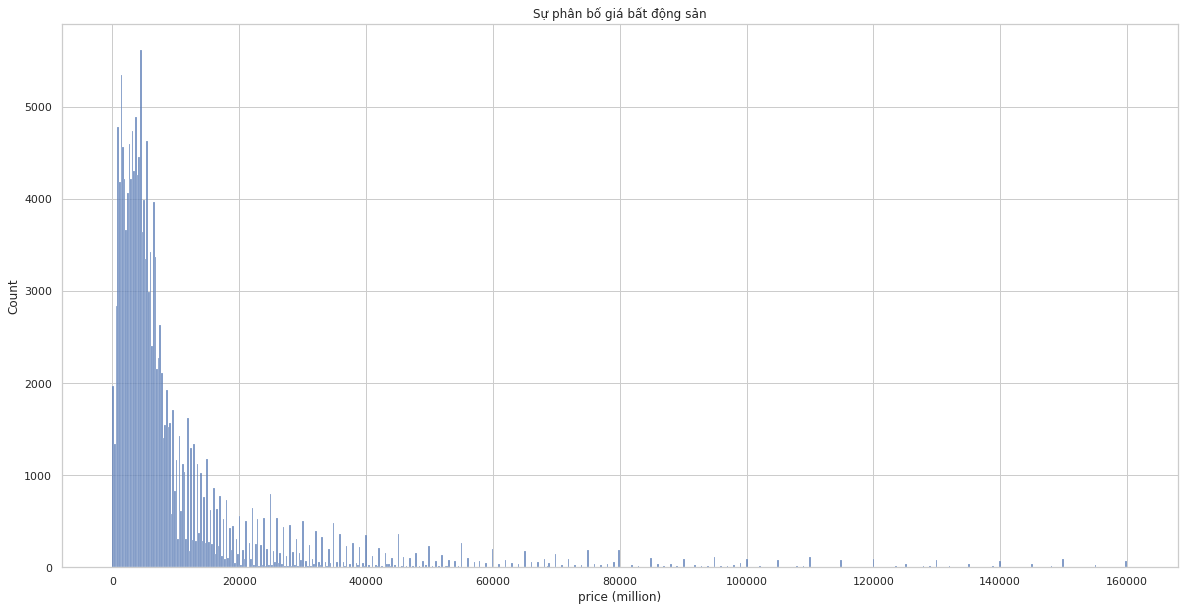

In [243]:
plt.figure(figsize=(20, 10))
plt.title("Sự phân bố giá bất động sản")
sns.histplot(data=BDS_df9[BDS_df9['price (million)']
             <= price_mark], x="price (million)")


=> Giá bất động sản phân bổ chủ yếu trong khoảng dưới 11 tỷ đồng


In [244]:
group_price = ['Giá rẻ', 'Tầm trung', 'Cao cấp', 'Siêu cao cấp']
# Giá rẻ :0 - 2 tỷ
# Tầm trung: 2 - 5 tỷ
# Cao cấp: 5 - 20 tỷ
# Siêu cao cấp: trên 20 tỷ
bins_price = [0, 2000, 5000, 20000, max(BDS_df1['price (million)'])]
BDS_df9['price-binned'] = pd.cut(BDS_df9['price (million)'],
                                 bins=bins_price, labels=group_price)


In [245]:
BDS_df9['price-binned'].value_counts()


Cao cấp         68704
Tầm trung       51571
Giá rẻ          29177
Siêu cao cấp    19225
Name: price-binned, dtype: int64

<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Số lượng giá bất động sản theo phân khúc sản phẩm')

<AxesSubplot:title={'center':'Số lượng giá bất động sản theo phân khúc sản phẩm'}, xlabel='price-binned', ylabel='count'>

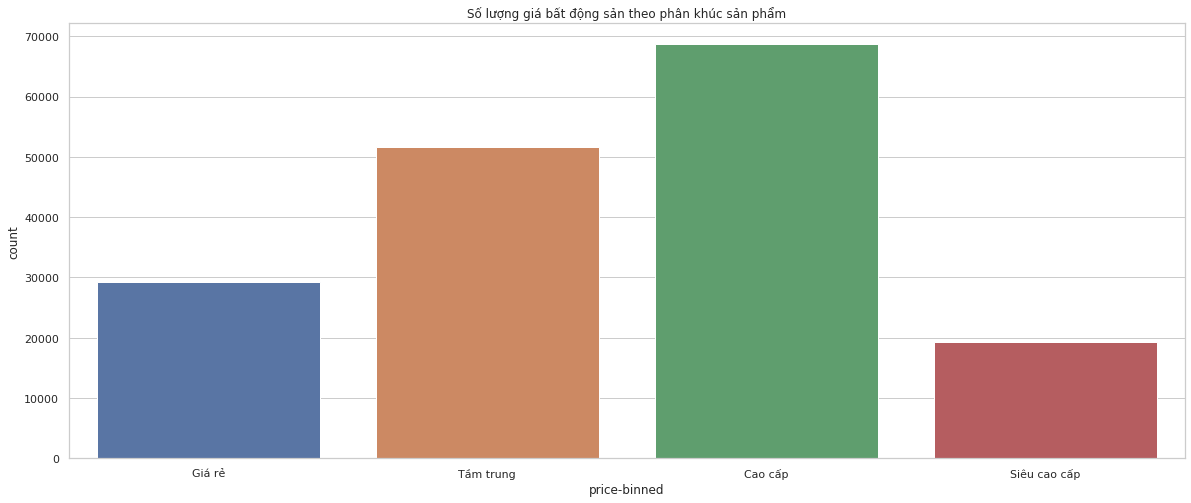

In [246]:
plt.figure(figsize=(20, 8))
plt.title("Số lượng giá bất động sản theo phân khúc sản phẩm")
sns.countplot(x='price-binned', data=BDS_df9)


=> Phân khúc giá BĐS tập trung chủ yếu là các BĐS tầm trung và cao cấp


### list time


In [ ]:
BDS_df9['year'] = BDS_df9['list_time'].dt.year
BDS_df9['month'] = BDS_df9['list_time'].dt.month


<Figure size 3600x1440 with 0 Axes>

<AxesSubplot:xlabel='list_time', ylabel='price (million)'>

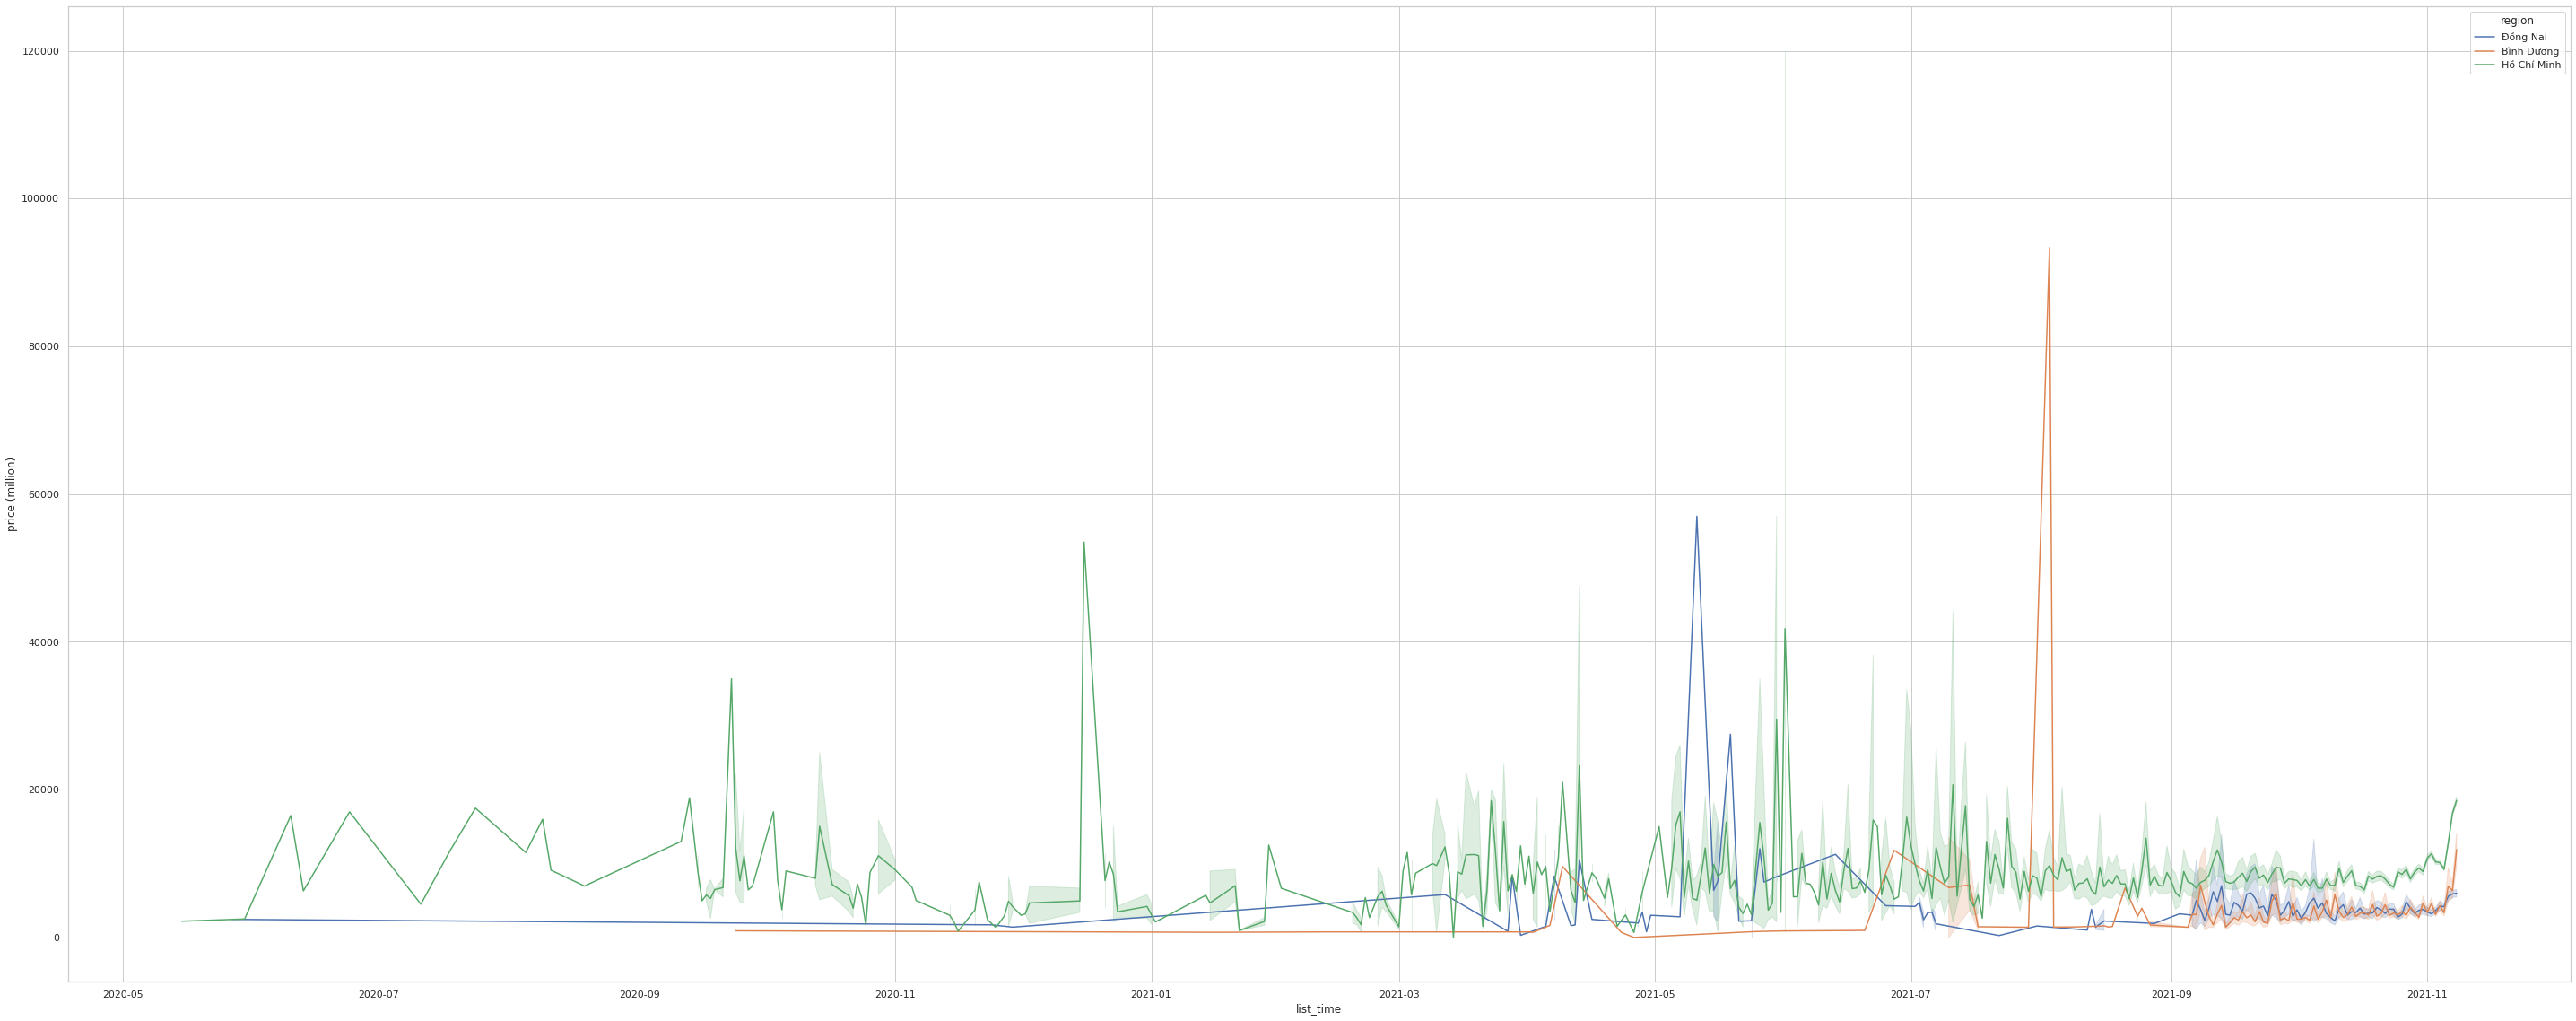

In [ ]:
plt.figure(figsize=(50, 20))
sns.lineplot(data=BDS_df9[BDS_df9['price (million)'] <= price_mark], x="list_time",
             y="price (million)", hue="region", dashes=False)


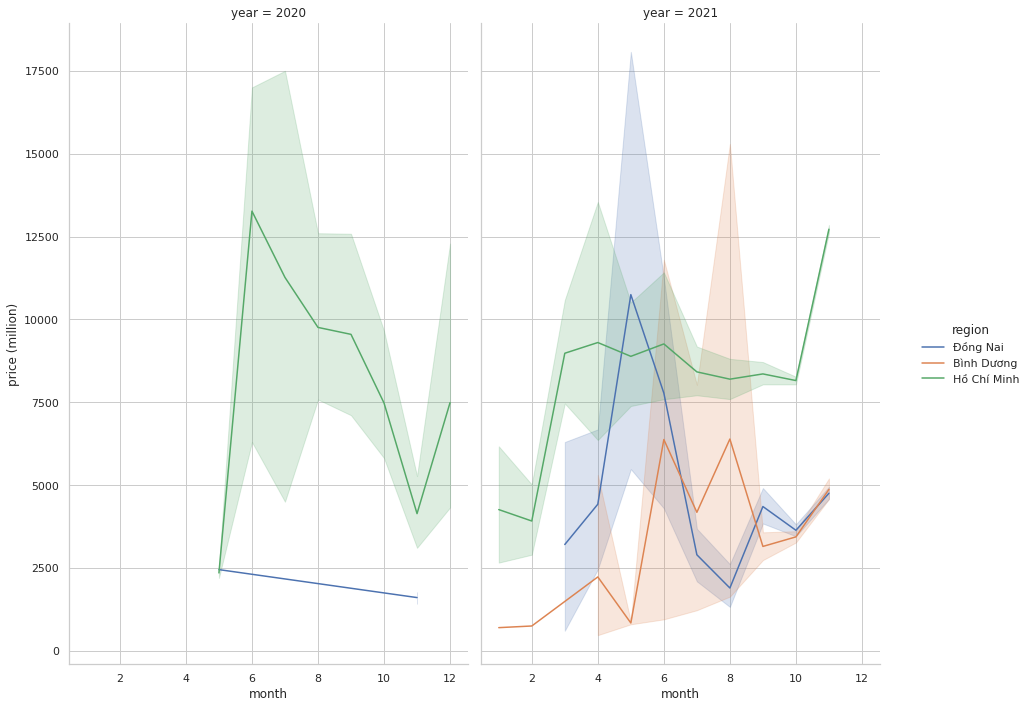

In [ ]:
grid = sns.FacetGrid(BDS_df9[BDS_df9['price (million)']
                     <= price_mark], hue="region", col="year", margin_titles=True, height=10, aspect=0.65)
grid.map(sns.lineplot, "month", "price (million)")
grid.add_legend()


## 3.3 Categorical variables


### Website


In [ ]:
BDS_df1['website'].unique()


array(['Chotot', 'alonhadat'], dtype=object)

<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Phân khúc giá bất động sản trên website')

<AxesSubplot:title={'center':'Phân khúc giá bất động sản trên website'}, xlabel='website', ylabel='count'>

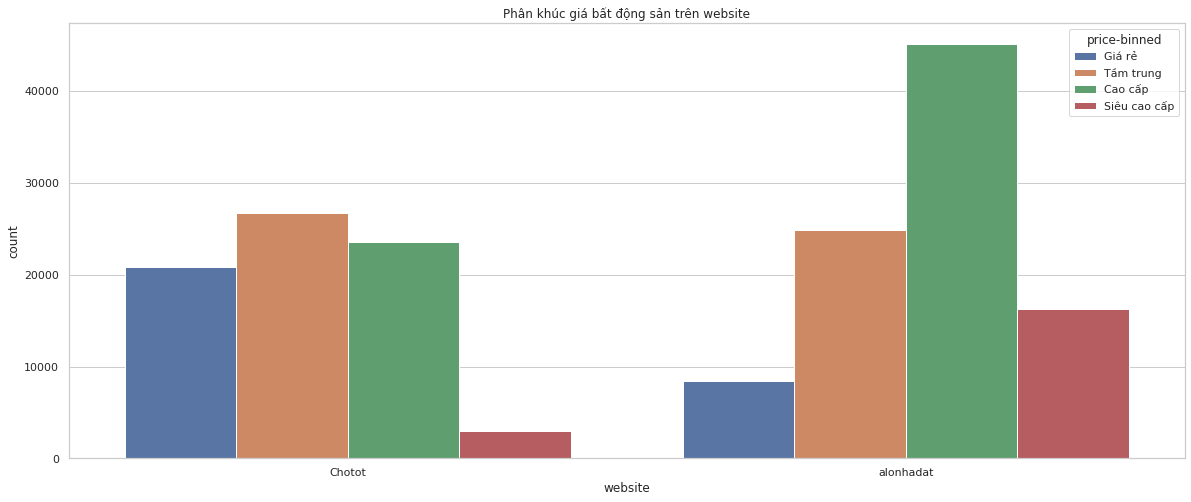

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("Phân khúc giá bất động sản trên website")
sns.countplot(x='website', hue='price-binned',
              data=BDS_df9)


<div> => Chotot tập trung chủ yếu các BĐS giá rẻ, tầm trung và cao cấp. Các BĐS siêu cao cấp chỉ chiếm thị phần nhỏ </div>
<div> => alonhadat chủ yếu được đăng bán các sản phẩm cao cấp </div>


### Region


=> Vì chỉ có 1 outlier làm giảm khả năng quan sát giá đất trên Đồng Nai, Bình Dương, Hồ Chí Minh nên cần làm xếp riêng trường hợp này để dễ quan sát


<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='region', ylabel='price (million)'>

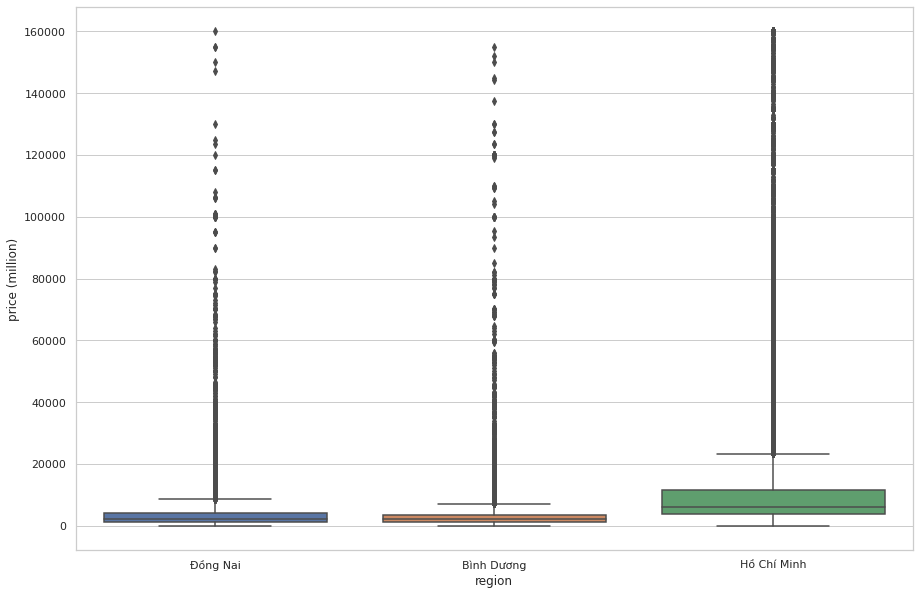

In [ ]:
plt.figure(figsize=(15, 10))
# sns.countplot(x='region',data=BDS_df1)
sns.boxplot(x='region', y='price (million)',
            data=BDS_df9[BDS_df9['price (million)'] <= price_mark])


=> Ta nhận thấy rằng các BĐS ở khu vực Tp Hồ Chí Minh có sự đa dạng về phân khúc hơn so với Bình Dương, Đồng Nai.


### property legal document

<Figure size 1440x576 with 0 Axes>

<AxesSubplot:xlabel='property_legal_document', ylabel='price (million)'>

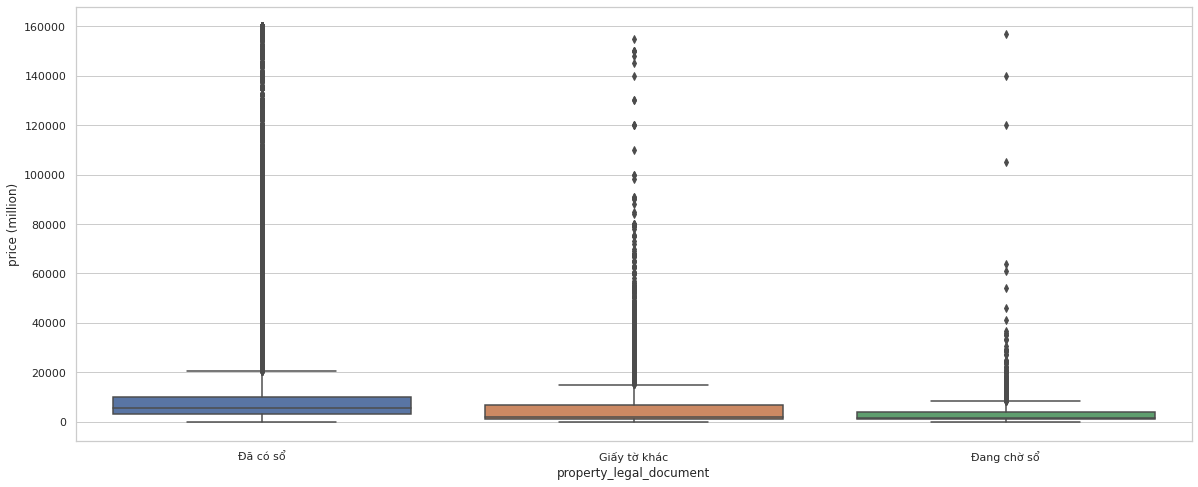

In [ ]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='property_legal_document', y='price (million)',
            data=BDS_df9[BDS_df9['price (million)'] <= price_mark])


<Figure size 1800x576 with 0 Axes>

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'Thành phố Biên Hòa'),
  Text(1, 0, 'Huyện Vĩnh Cửu'),
  Text(2, 0, 'Huyện Trảng Bom'),
  Text(3, 0, 'Huyện Nhơn Trạch'),
  Text(4, 0, 'Thành phố Long Khánh'),
  Text(5, 0, 'Huyện Long Thành'),
  Text(6, 0, 'Huyện Xuân Lộc'),
  Text(7, 0, 'Huyện Thống Nhất'),
  Text(8, 0, 'Huyện Cẩm Mỹ'),
  Text(9, 0, 'Huyện Tân Phú'),
  Text(10, 0, 'Huyện Định Quán'),
  Text(11, 0, 'Thành phố Thuận An'),
  Text(12, 0, 'Thành phố Dĩ An'),
  Text(13, 0, 'Thành phố Thủ Dầu Một'),
  Text(14, 0, 'Thị xã Bến Cát'),
  Text(15, 0, 'Thị xã Tân Uyên'),
  Text(16, 0, 'Huyện Bàu Bàng'),
  Text(17, 0, 'Huyện Phú Giáo'),
  Text(18, 0, 'Huyện Dầu Tiếng'),
  Text(19, 0, 'Huyện Bắc Tân Uyên'),
  Text(20, 0, 'Quận Gò Vấp'),
  Text(21, 0, 'Quận 8'),
  Text(22, 0, 'Quận Tân Phú'),
  Text(23, 0, 'Quận 12'),
  T

<Figure size 720x432 with 0 Axes>

[None, None, None, None, None, None, None, None, None]

(array([0, 1, 2]),
 [Text(0, 0, 'Đồng Nai'), Text(1, 0, 'Bình Dương'), Text(2, 0, 'Hồ Chí Minh')])

<Figure size 720x432 with 0 Axes>

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Đông Nam'),
  Text(1, 0, 'Đông Bắc'),
  Text(2, 0, 'Đông'),
  Text(3, 0, 'Tây'),
  Text(4, 0, 'Nam'),
  Text(5, 0, 'Tây Bắc'),
  Text(6, 0, 'Tây Nam'),
  Text(7, 0, 'Bắc')])

<Figure size 720x432 with 0 Axes>

[None, None, None, None, None, None, None, None, None]

(array([0, 1, 2]),
 [Text(0, 0, 'Đã có sổ'),
  Text(1, 0, 'Giấy tờ khác'),
  Text(2, 0, 'Đang chờ sổ')])

<Figure size 720x432 with 0 Axes>

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Nhiều hơn 6'),
  Text(1, 0, '2'),
  Text(2, 0, '1'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '3'),
  Text(6, 0, '6')])

<Figure size 1800x576 with 0 Axes>

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Nhà mặt tiền'),
  Text(1, 0, 'Nhà trong hẻm'),
  Text(2, 0, 'Biệt thự, nhà liền kề'),
  Text(3, 0, 'Đất thổ cư'),
  Text(4, 0, 'Đất nông, lâm nghiệp'),
  Text(5, 0, 'Đất công nghiệp'),
  Text(6, 0, 'Đất nền dự án'),
  Text(7, 0, 'Nhà hàng, khách sạn'),
  Text(8, 0, 'Phòng trọ, nhà trọ'),
  Text(9, 0, 'Kho, xưởng'),
  Text(10, 0, 'Chung cư'),
  Text(11, 0, 'Mặt bằng'),
  Text(12, 0, 'Văn phòng'),
  Text(13, 0, 'Shop, kiot, quán'),
  Text(14, 0, 'Trang trại'),
  Text(15, 0, 'Các loại khác')])

<Figure size 720x432 with 0 Axes>

[None, None, None, None, None, None]

(array([0, 1]), [Text(0, 0, 'Chotot'), Text(1, 0, 'alonhadat')])

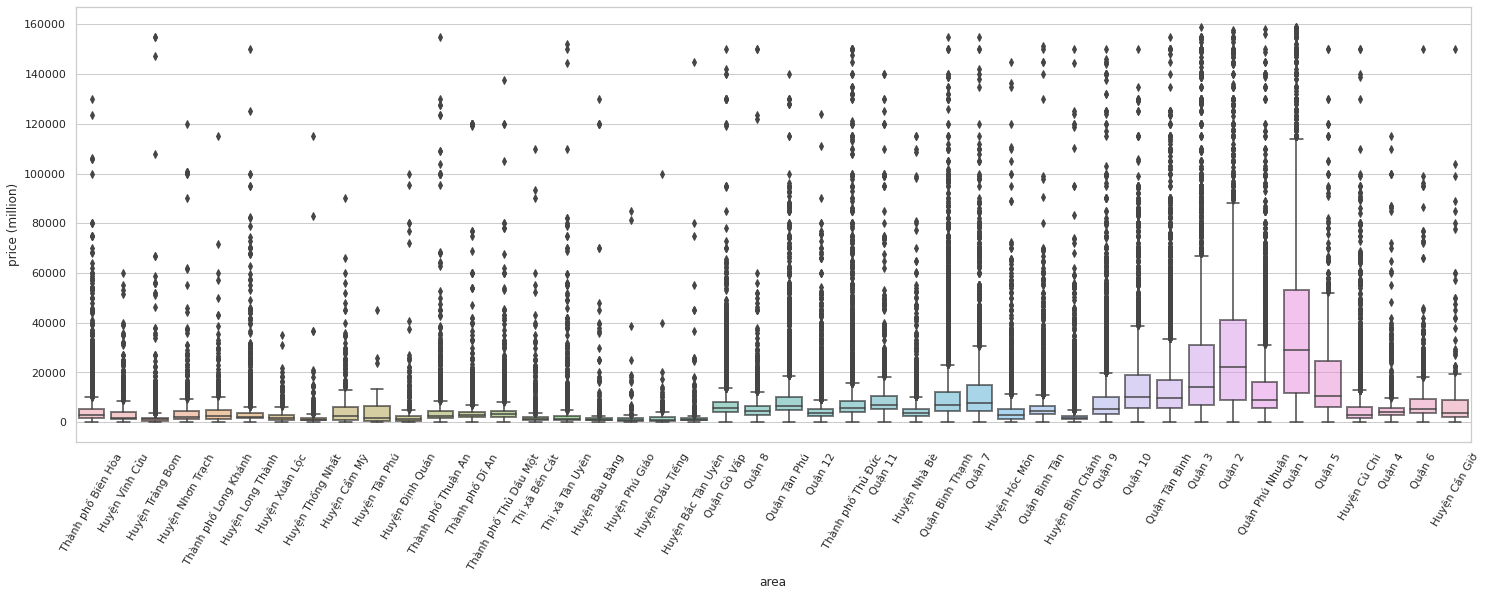

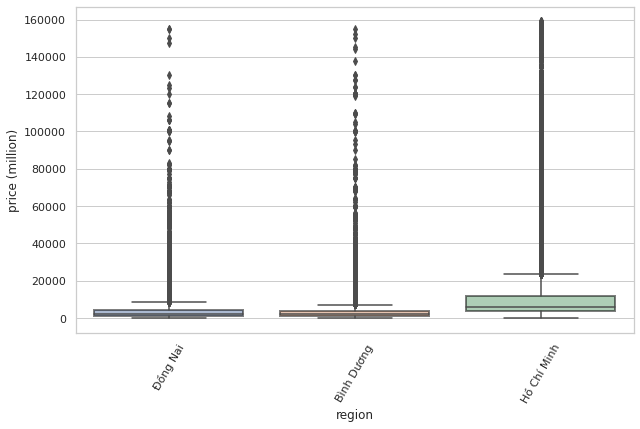

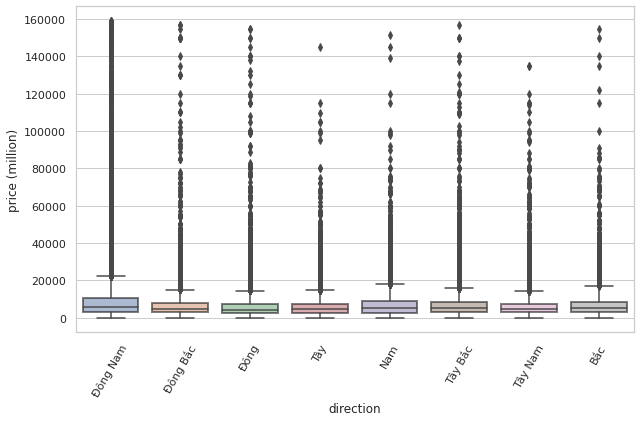

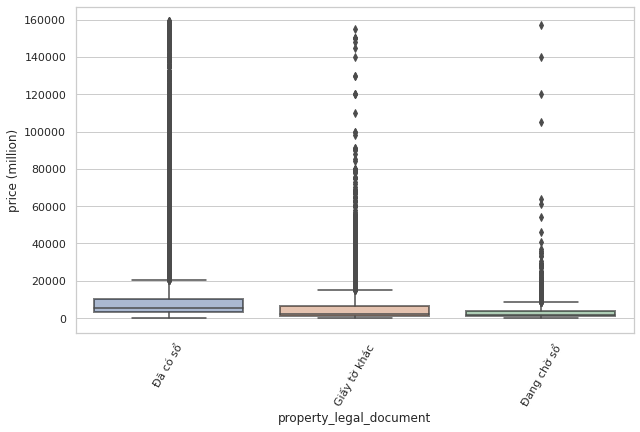

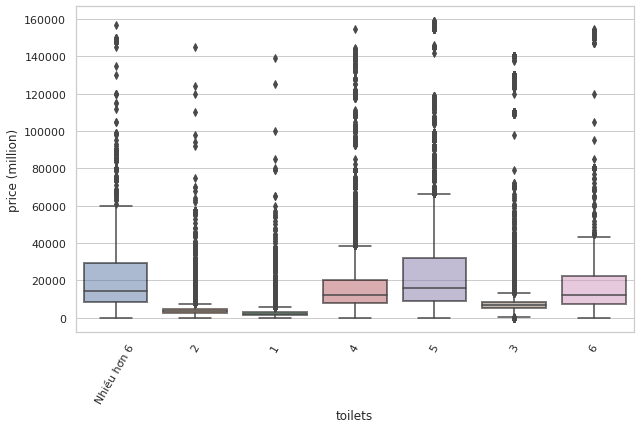

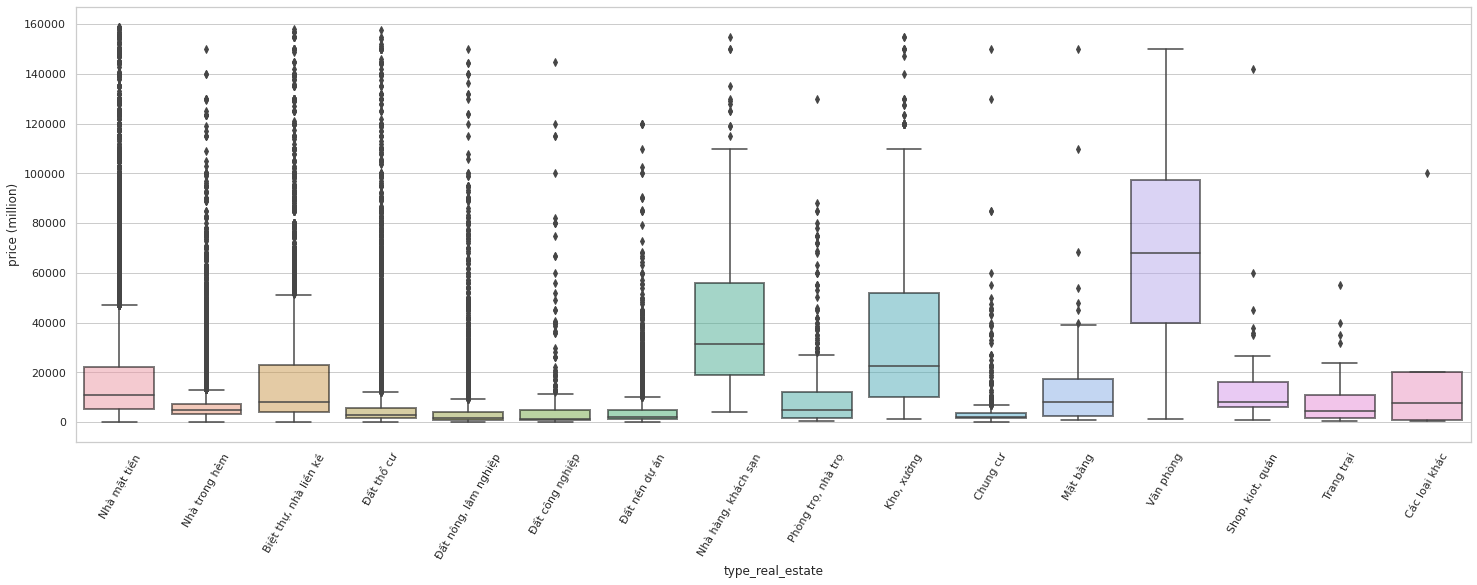

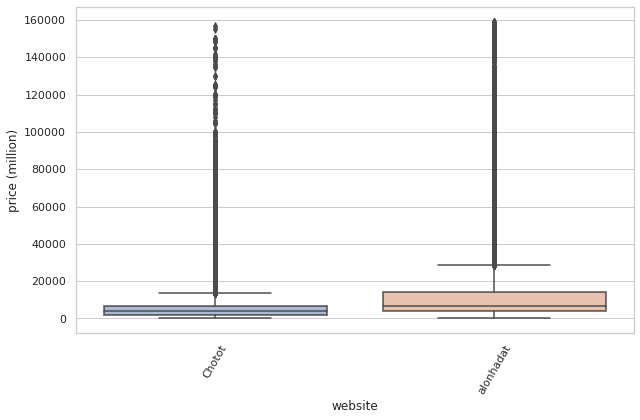

In [ ]:
for col in BDS_df9.columns:
    if BDS_df9[col].dtypes == 'object' and col not in ['list_time', 'ward']:
        if col in ['area', 'type_real_estate', 'rooms', 'floors', 'floornumber']:
            plt.figure(figsize=(25, 8))
        else:
            plt.figure(figsize=(10, 6))
        ax = sns.boxplot(x=col, y='price (million)',
                         data=BDS_df9[BDS_df9['price (million)'] < price_mark])
        plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
        plt.xticks(rotation=60)
